# EDA Testing

This notebook will be used to try different statistical methods and diagrams that I want to include in my final writeup presentation. These analyses will probably be exported into some sort of Python file for utility packages. I also want to look into how I can create Juptyer notebooks from Python scripts because I'm going to be doing close to the same analysis for every chorale, so having a script that I can just run to generate all the analyses instantly would be super convenient.

## Importing Libraries and Loading my Music

Start by getting the music ready-to-go and analyzed. Also load any required packages!

In [36]:
# helper function to load music with good indexing
def import_music(fpath):
    part_ids = ['S', 'A', 'T', 'B']
    score = converter.parse(fpath)
    for i in range(4):
        score.parts[i].id = part_ids[i]
    return score

In [37]:
from music21 import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

original = import_music('BWV392/BWV392_Original.mxl')
deepbach1 = import_music('BWV392/BWV392_DeepBach1.mxl')
deepbach2 = import_music('BWV392/BWV392_DeepBach2.mxl')
deepbach3 = import_music('BWV392/BWV392_DeepBach3.mxl')
# deepbach4 = import_music('BWV392/BWV392_DeepBach4.mxl')

score_dict = {
    'Original':import_music('BWV392/BWV392_Original.mxl'),
    'DeepBach #1':import_music('BWV392/BWV392_DeepBach1.mxl'),
    'DeepBach #2':import_music('BWV392/BWV392_DeepBach2.mxl'),
    'DeepBach #3':import_music('BWV392/BWV392_DeepBach3.mxl')
}

## Plotting Pitch Distribution

These graphs show the number of occurrences of each pitch in each chorale. Note that this is not counting *pitch class* but also includes the octave that they are sung in:

### Helper Plotting Function

In [38]:
def plot_pitch_distributions(score_dict, title, part=None):
    graphs = []
    
    for key in score_dict.keys():
        if part is not None:
            graphs.append(score_dict[key].parts[part].plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches', title=f'{title} {key}').figure)
        else:
            graphs.append(score_dict[key].plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches', title=f'{title} {key}').figure)

    for g in graphs:
        display(g)

### All Parts

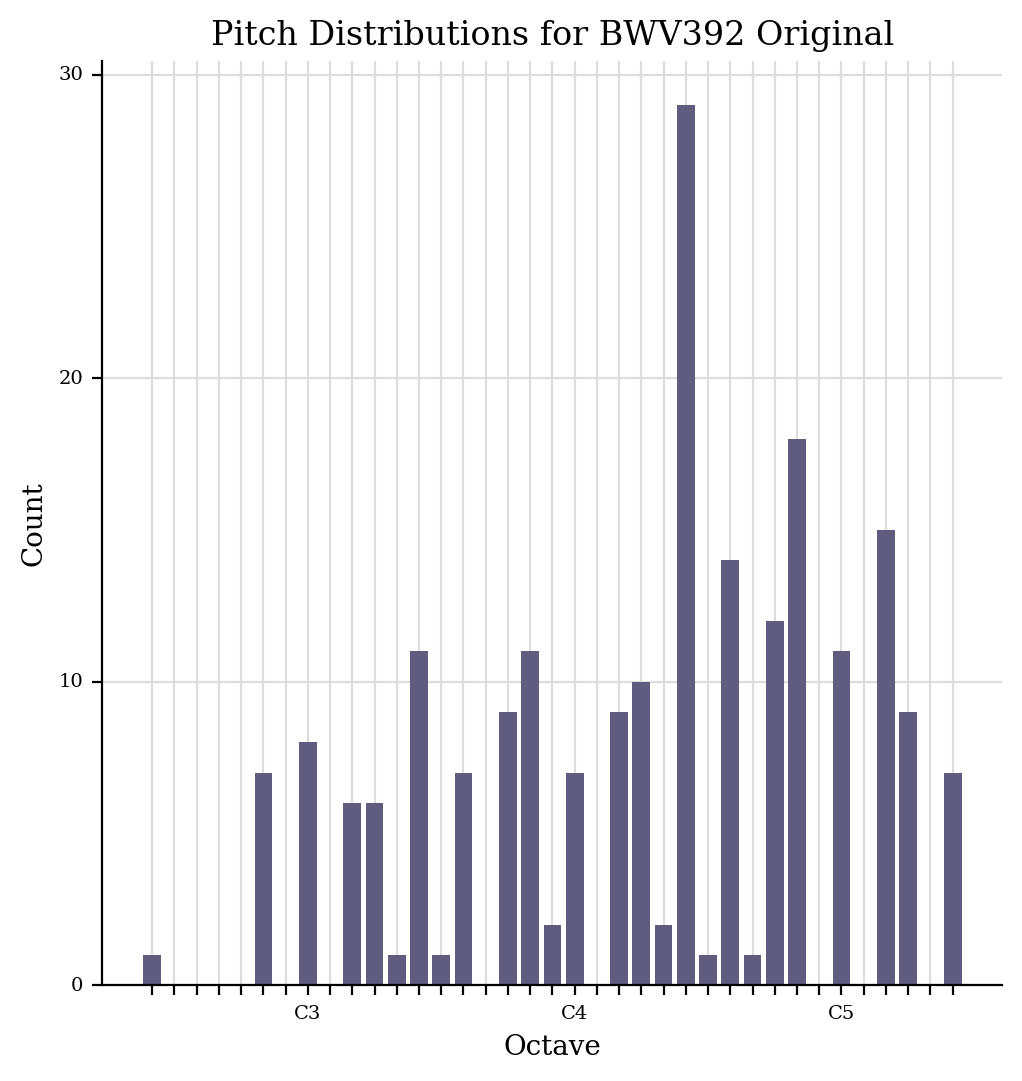

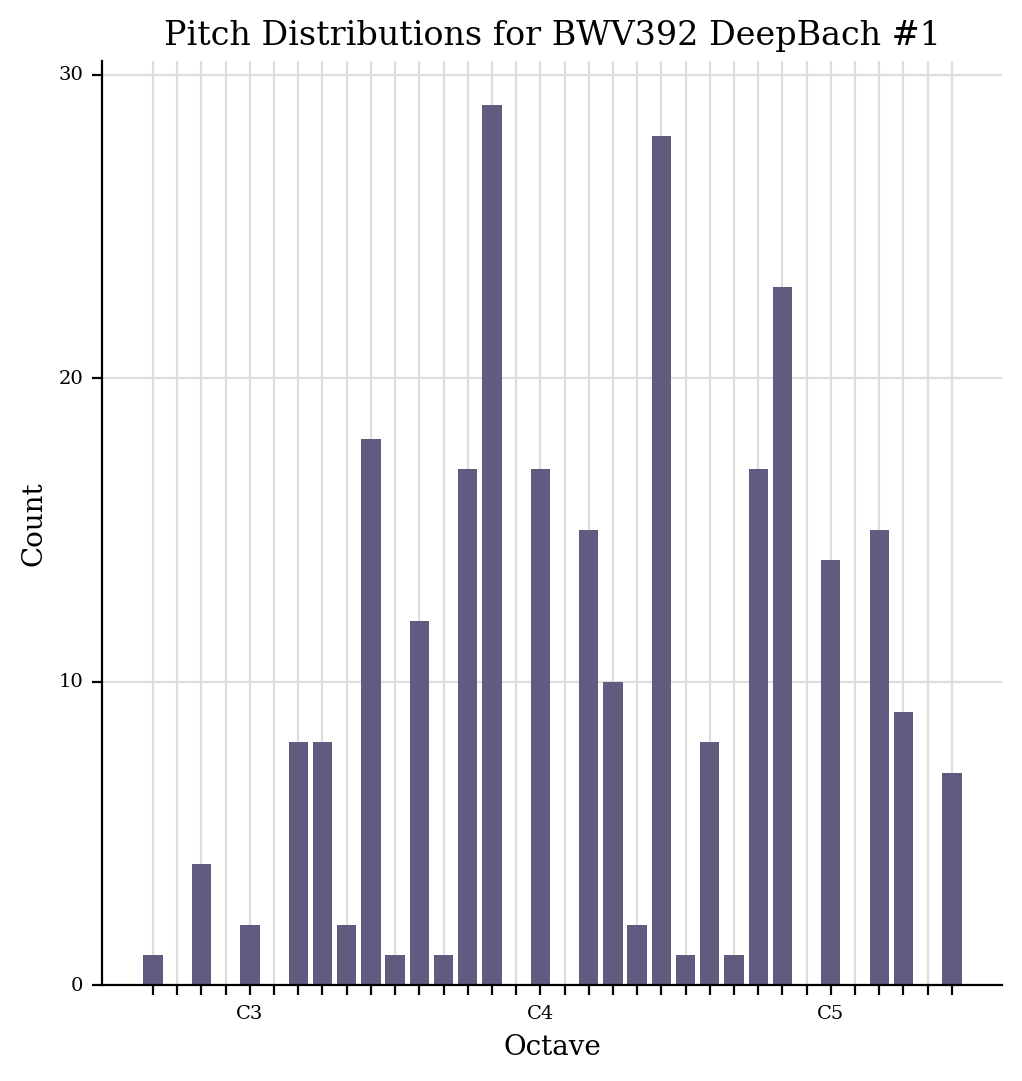

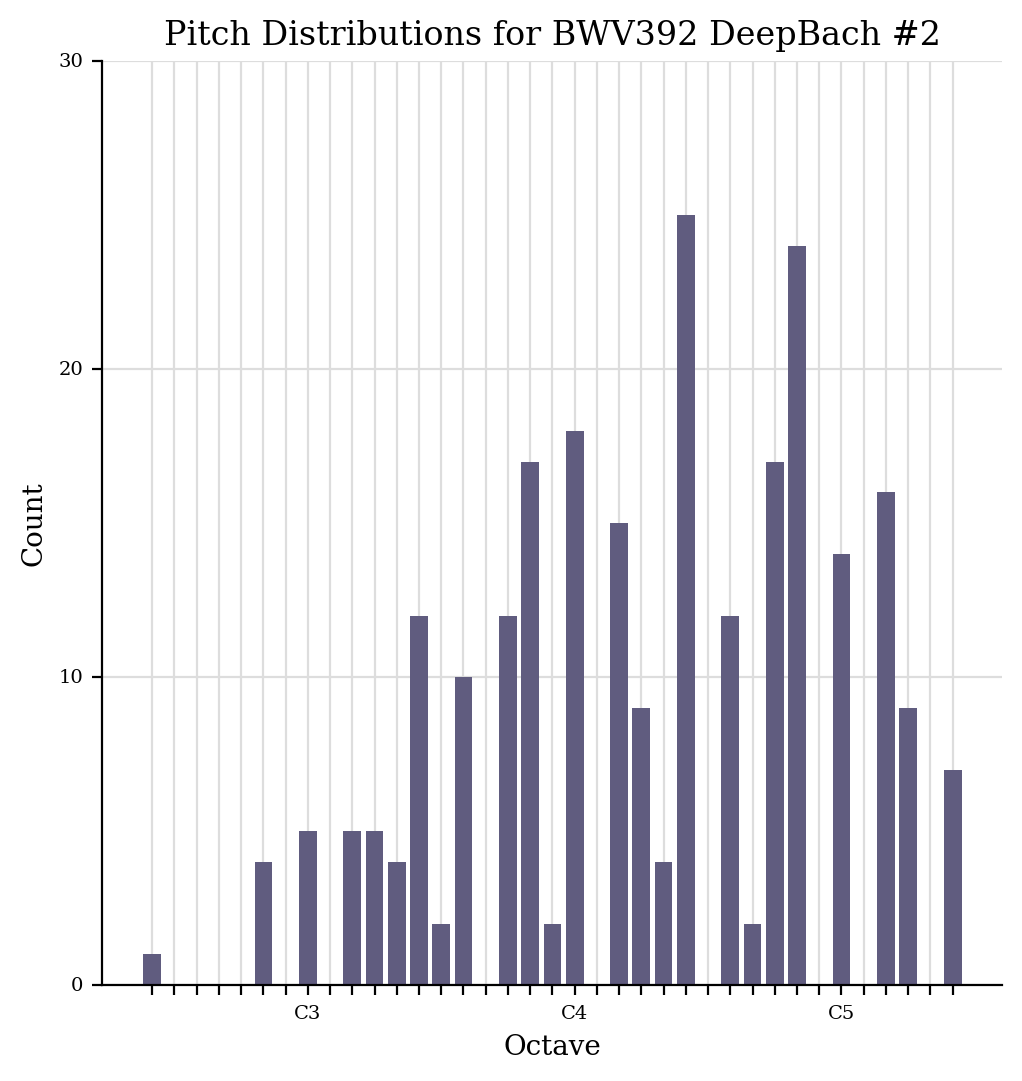

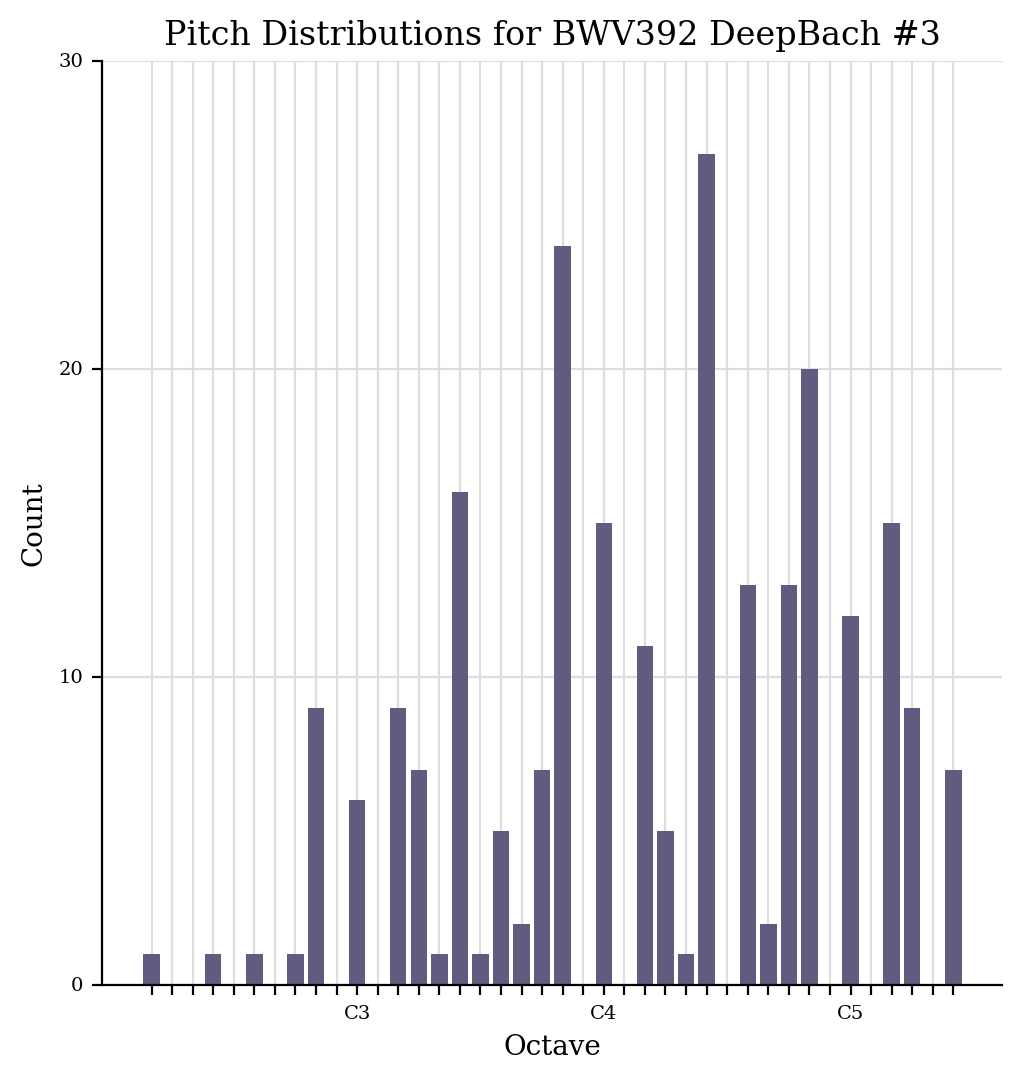

In [39]:
plot_pitch_distributions(score_dict, 'Pitch Distributions for BWV392')

### Alto

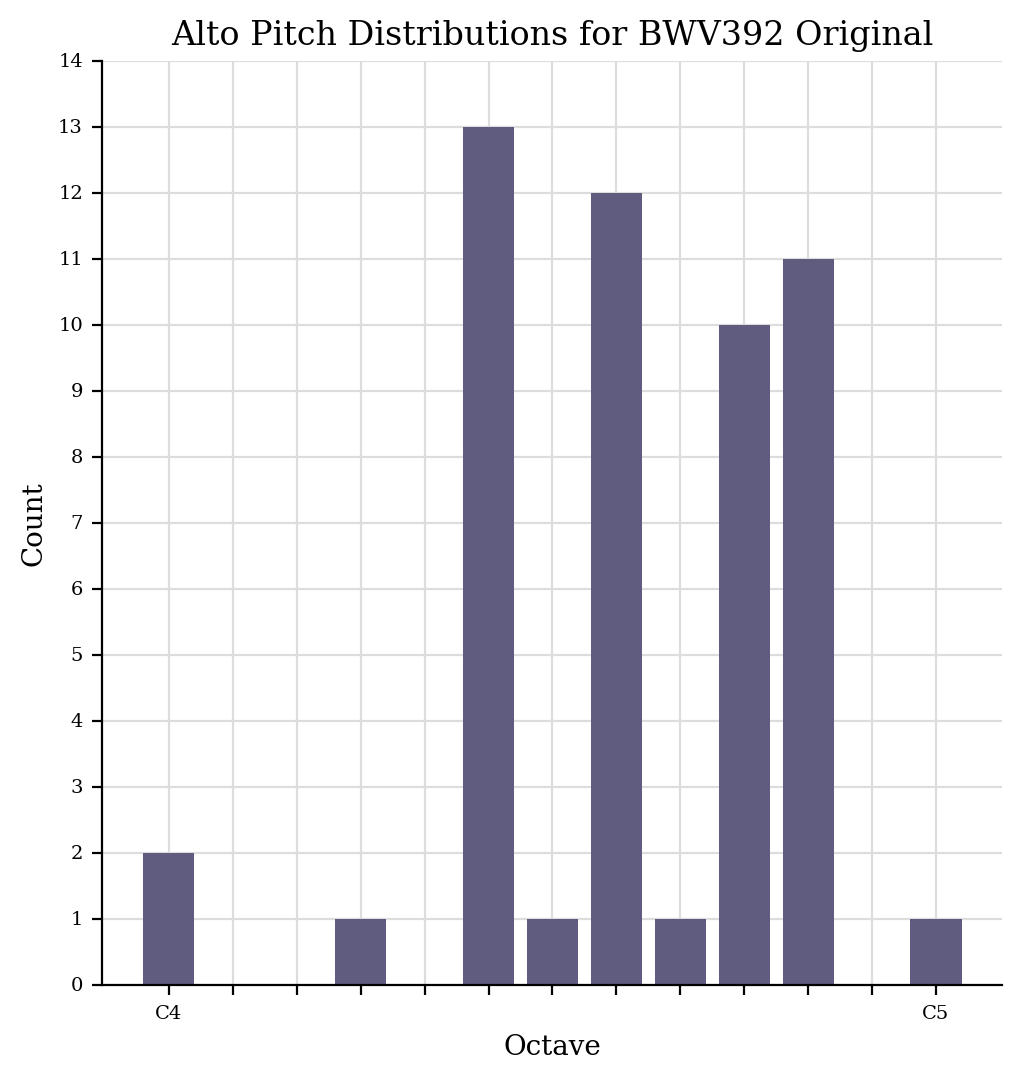

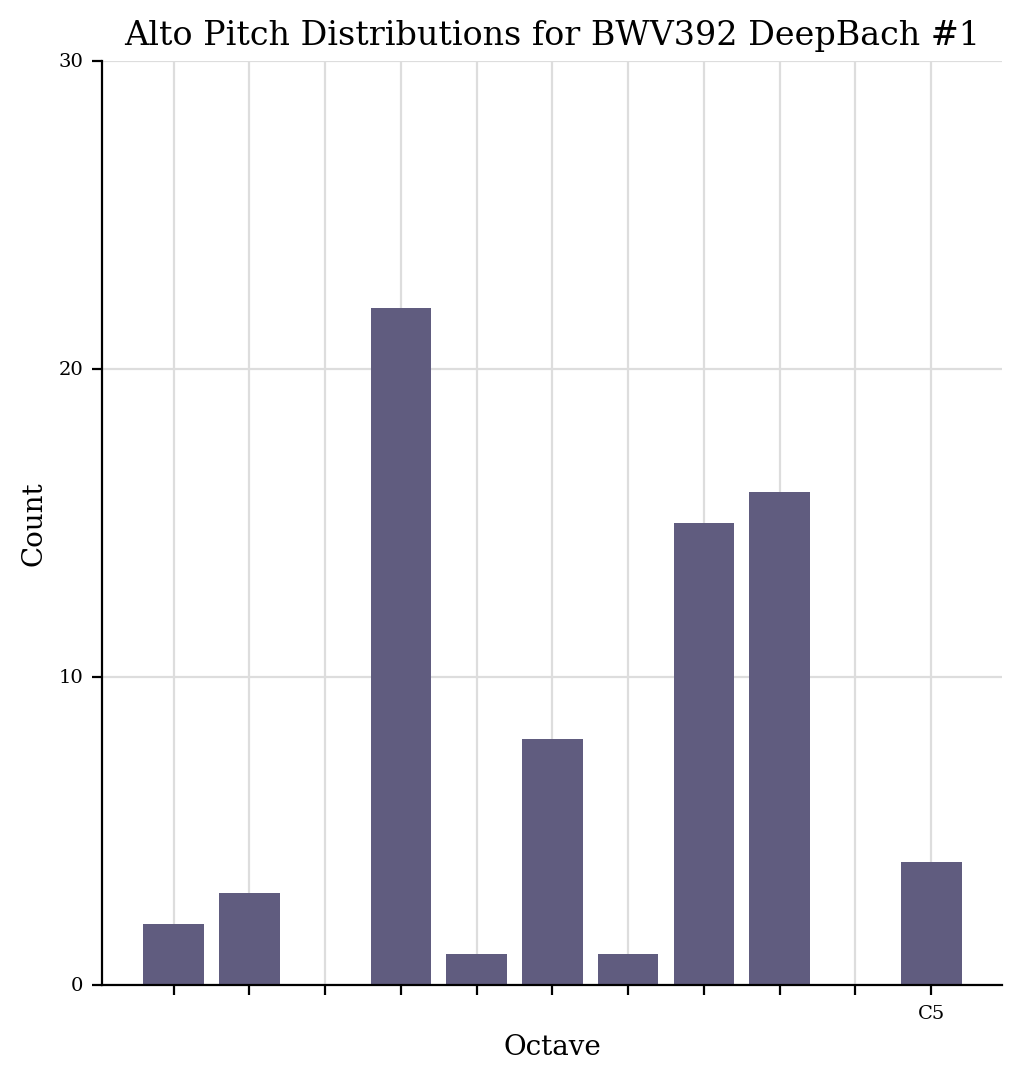

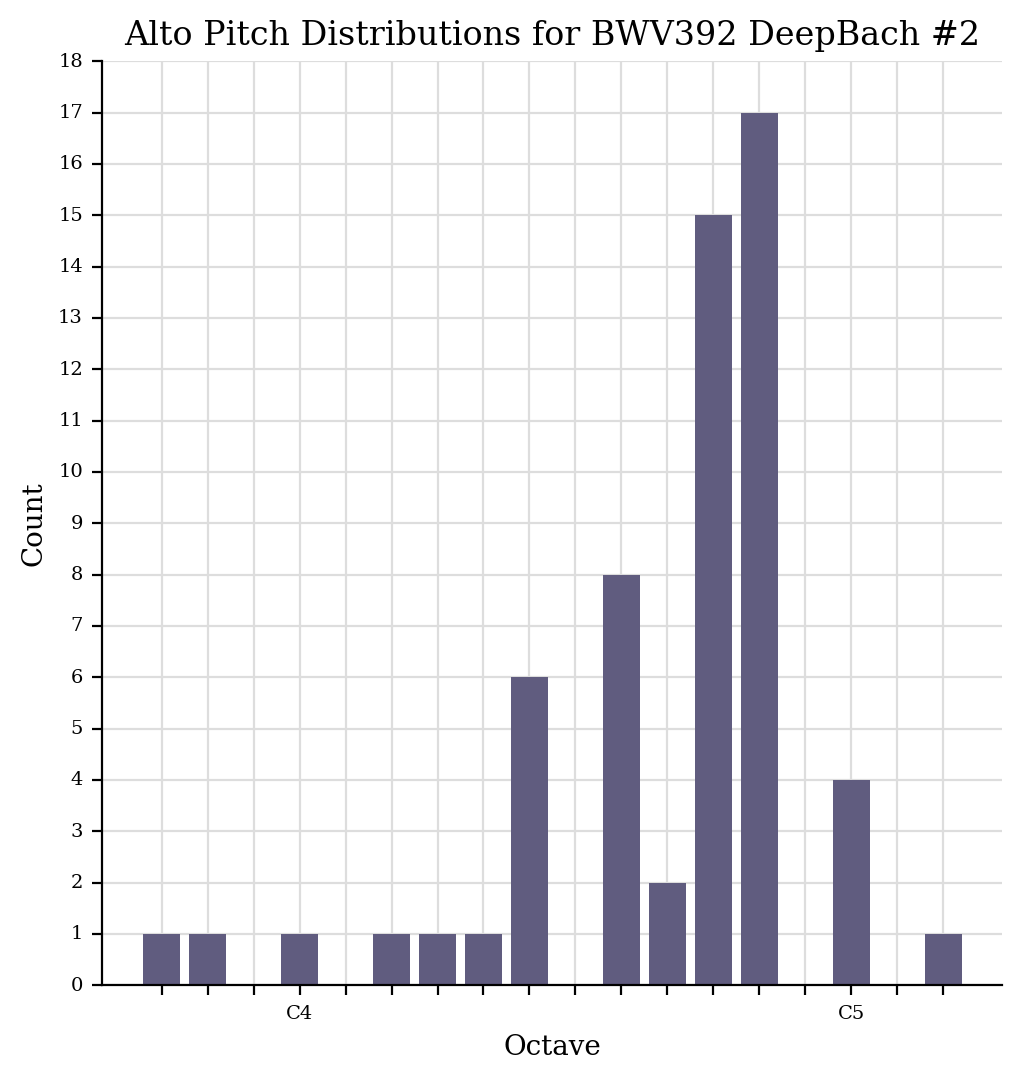

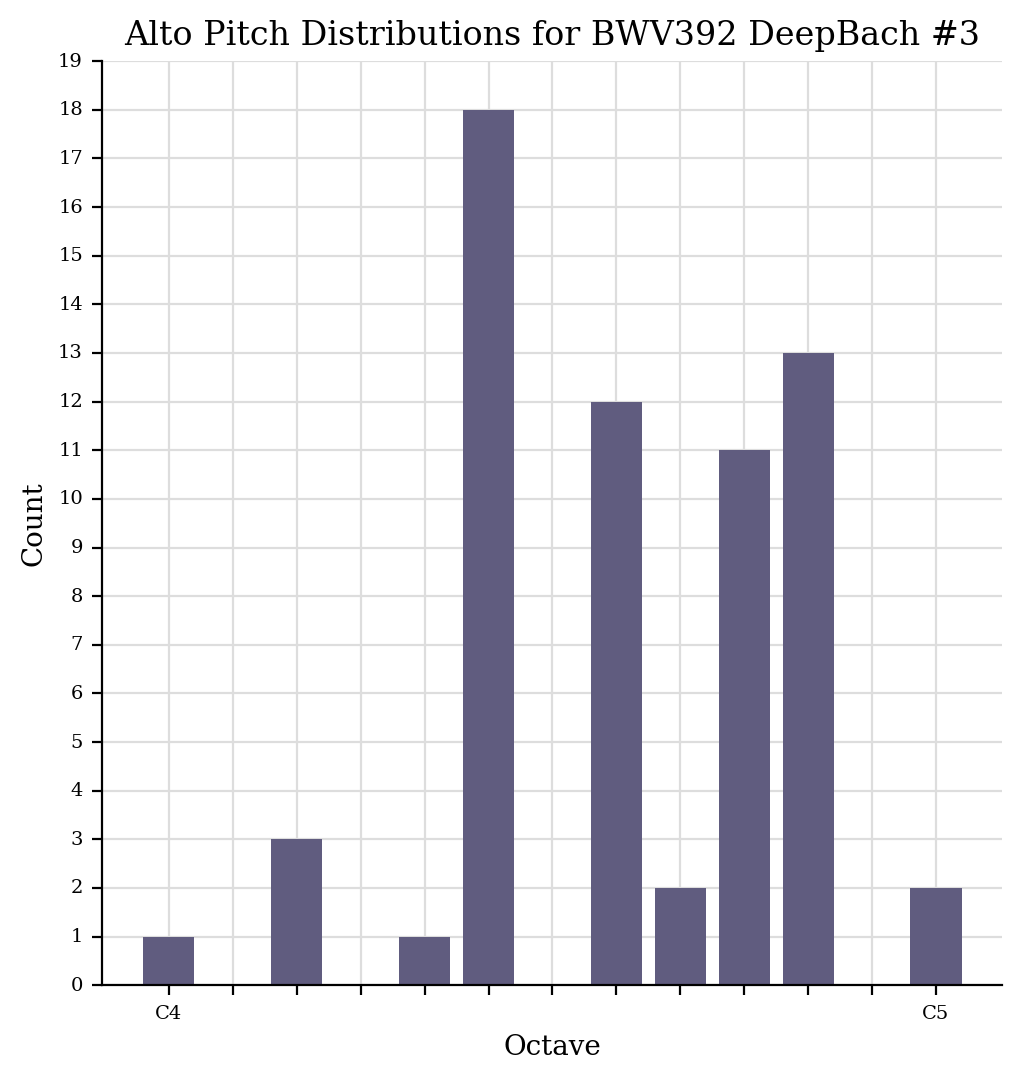

In [40]:
plot_pitch_distributions(score_dict, 'Alto Pitch Distributions for BWV392', part='A')

### Tenor

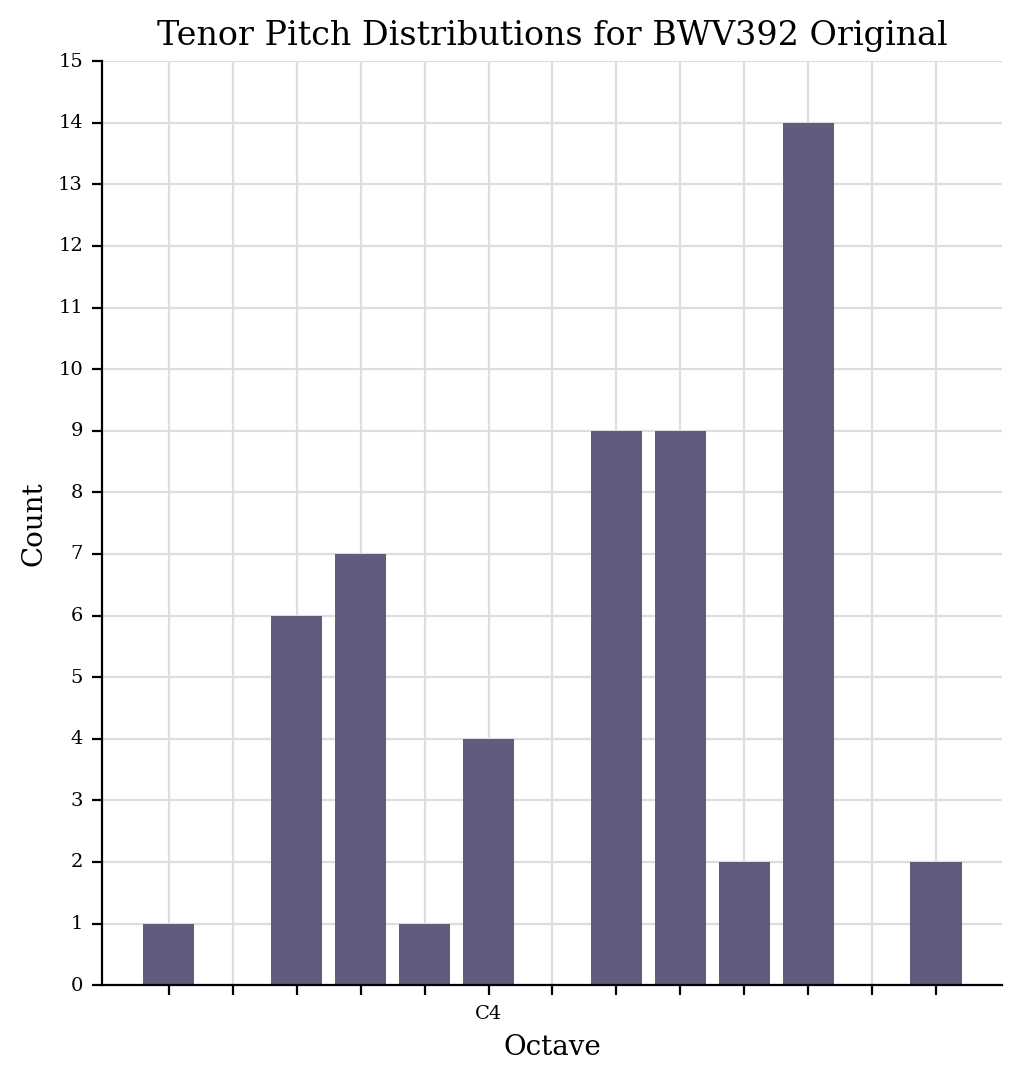

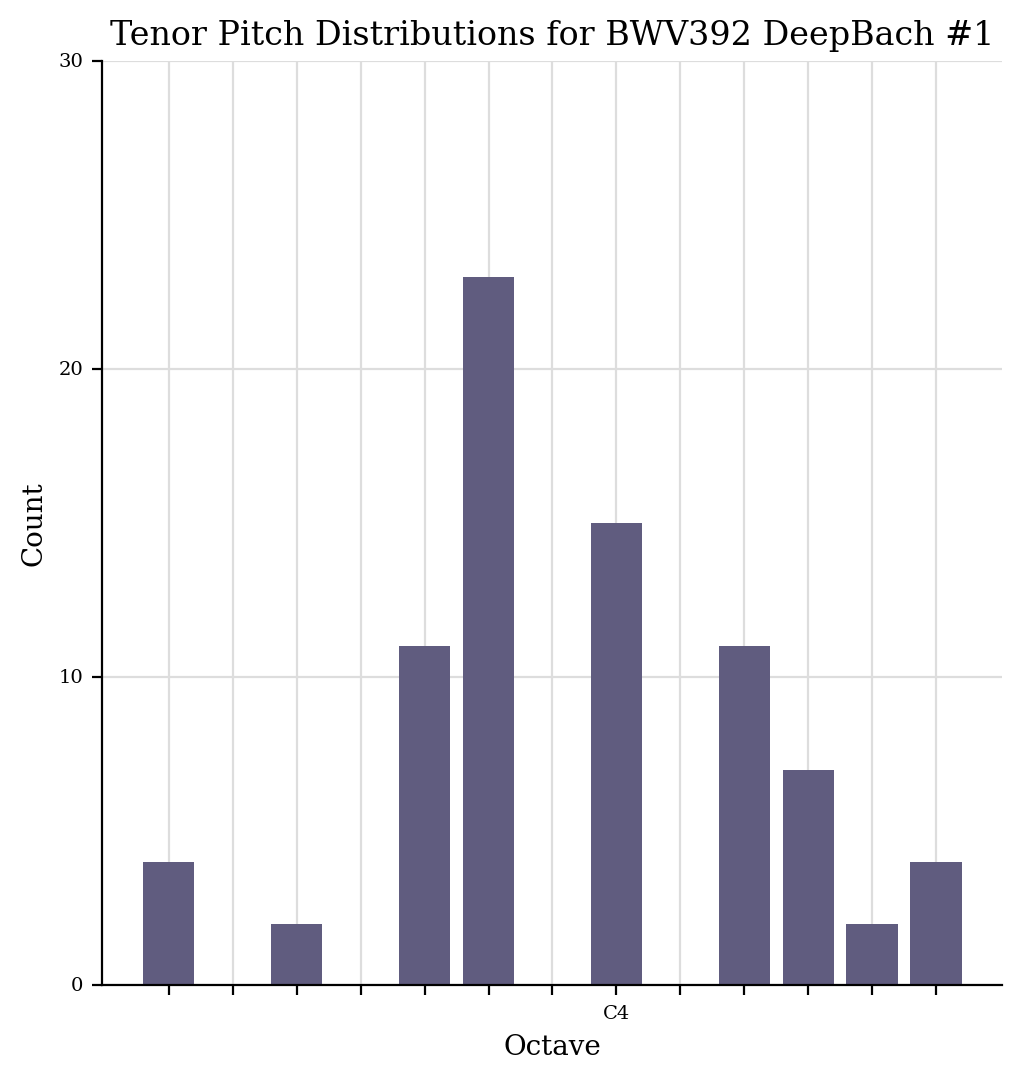

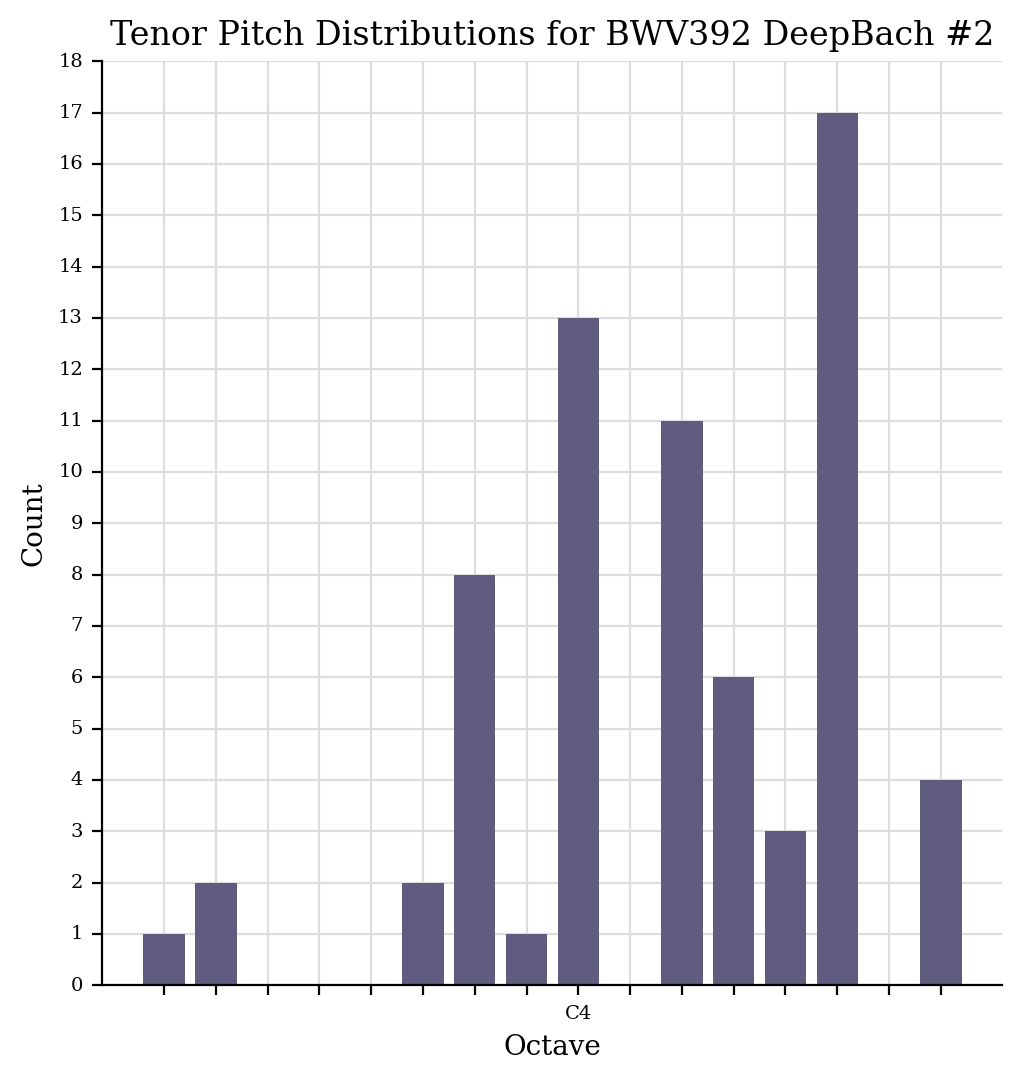

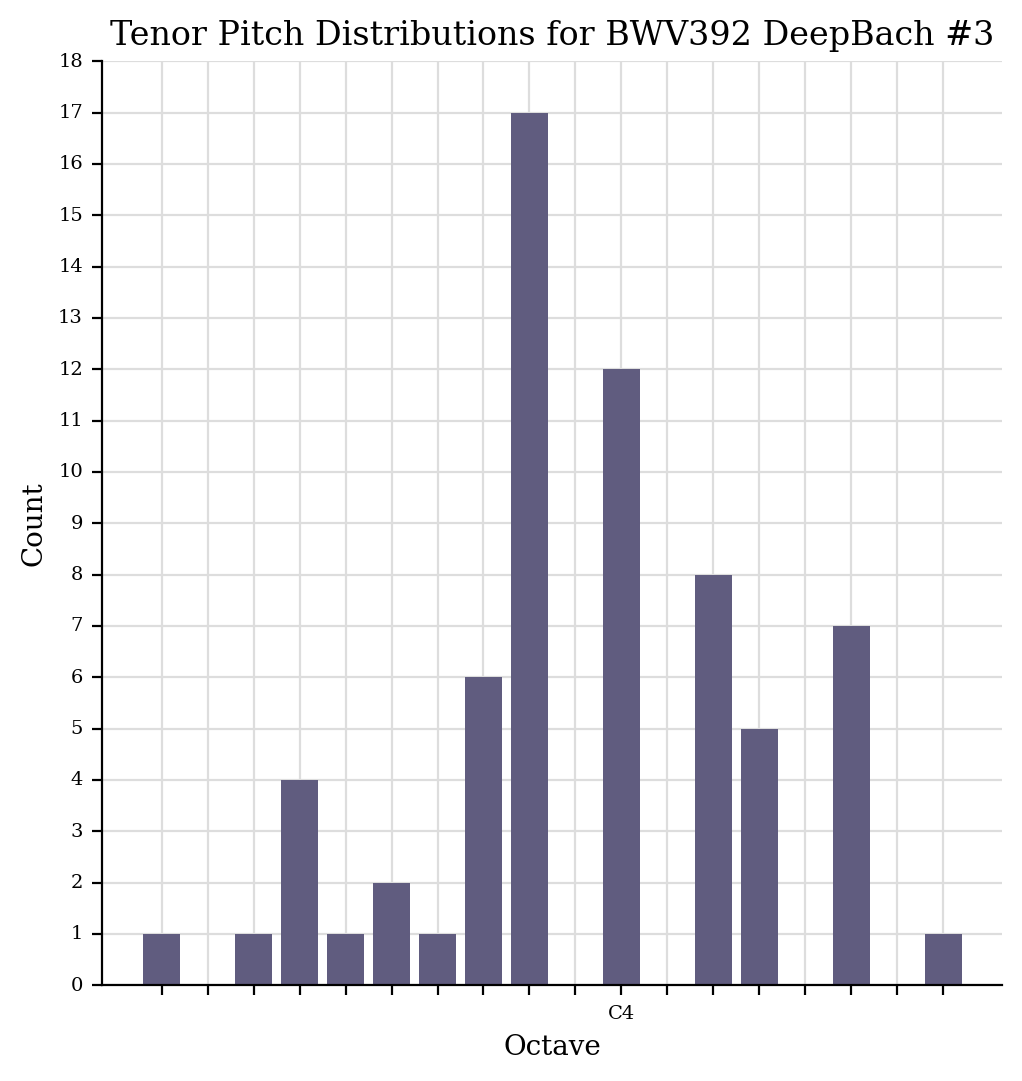

In [41]:
plot_pitch_distributions(score_dict, 'Tenor Pitch Distributions for BWV392', part='T')

### Bass

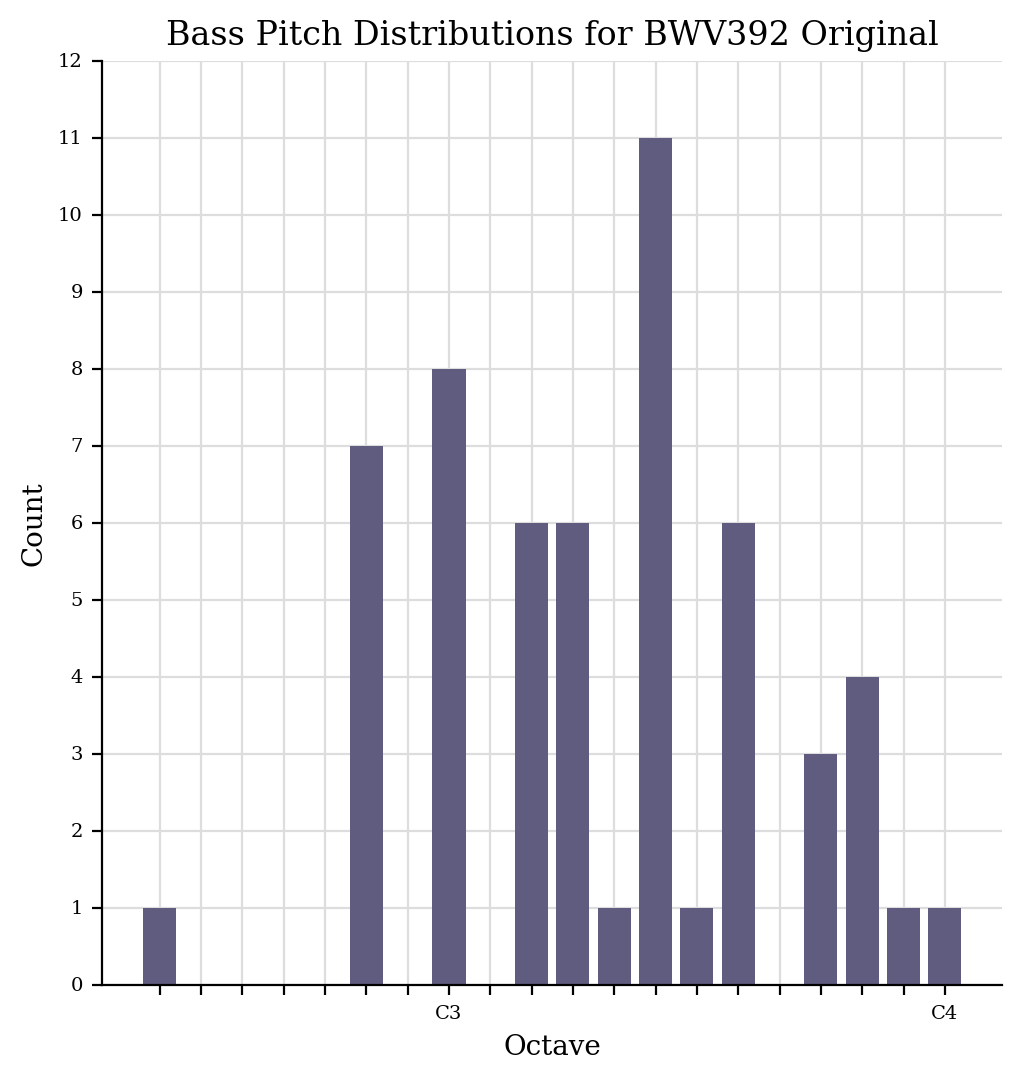

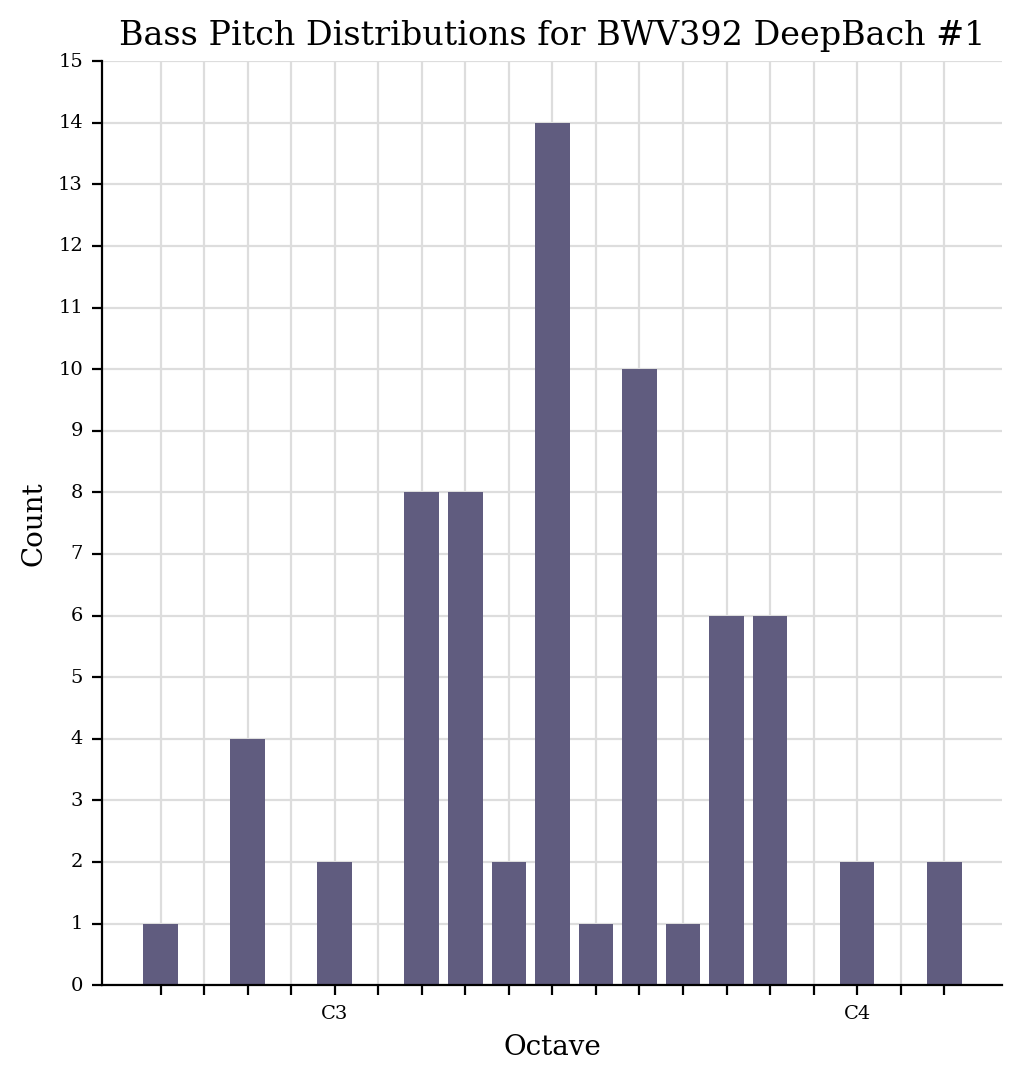

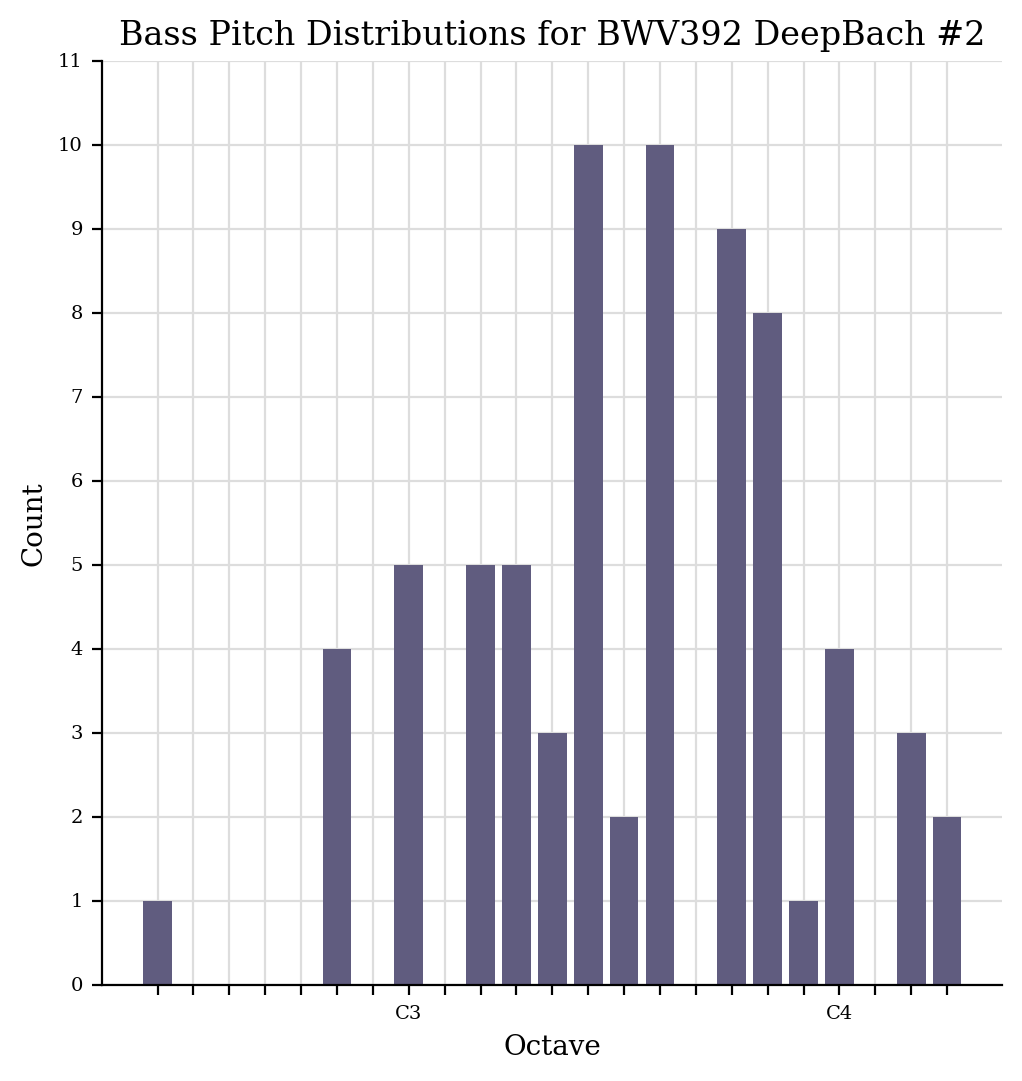

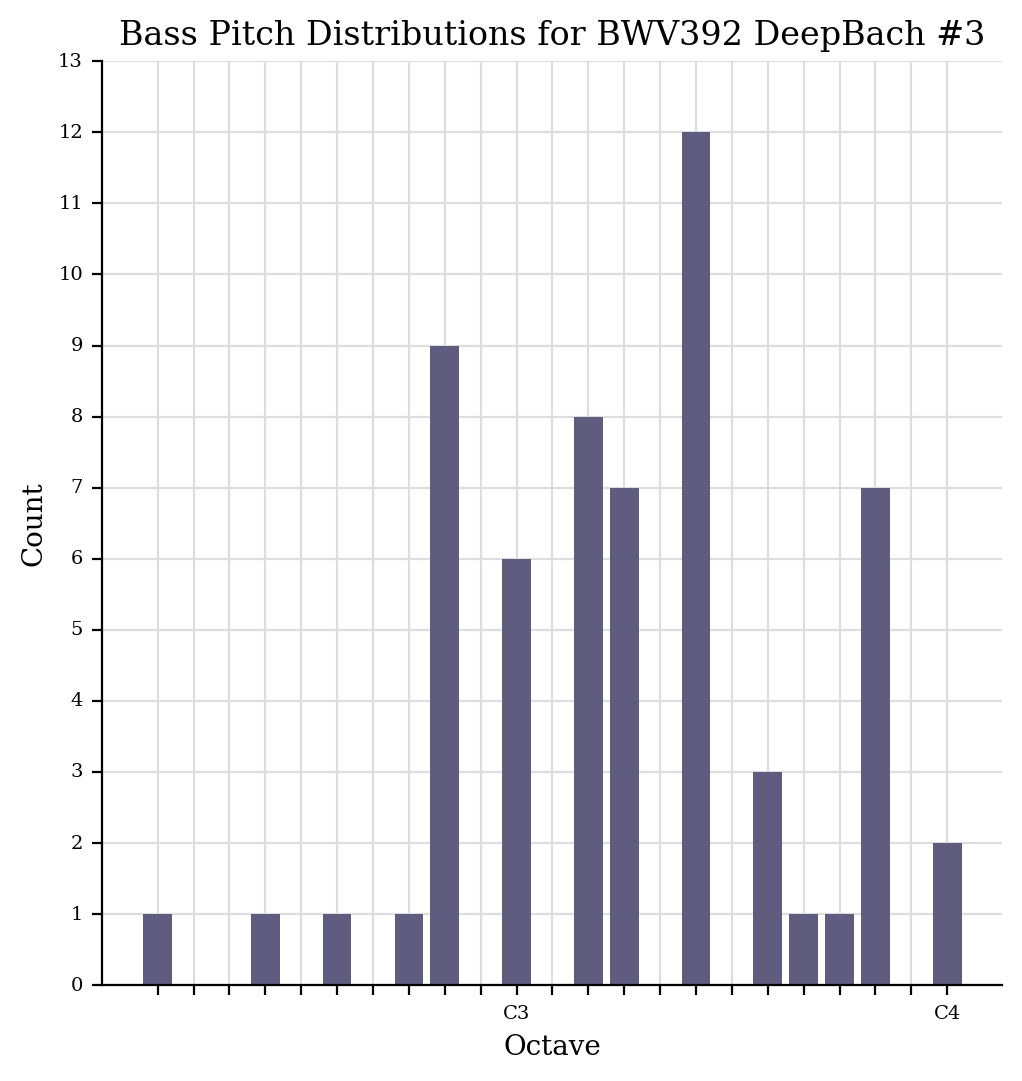

In [42]:
plot_pitch_distributions(score_dict, 'Bass Pitch Distributions for BWV392', part='B')

## Rhythm Comparisons

Since the AI wants to add quicker rhythms, we can plot this by measure the length of the quarter note.

### Helper Function

In [43]:
def plot_rhythm_distributions(score_dict, title, part=None):
    graphs = []
    
    for key in score_dict.keys():
        if part is not None:
            graphs.append(score_dict[key].parts[part].plot('histogram', 'duration', xHideUnused=False, yAxisLabel='Quarter Note Length', title=f'{title} {key}').figure)
        else:
            graphs.append(score_dict[key].plot('histogram', 'duration', xHideUnused=False, yAxisLabel='Quarter Note Length', title=f'{title} {key}').figure)

    for g in graphs:
        display(g)

### All Parts

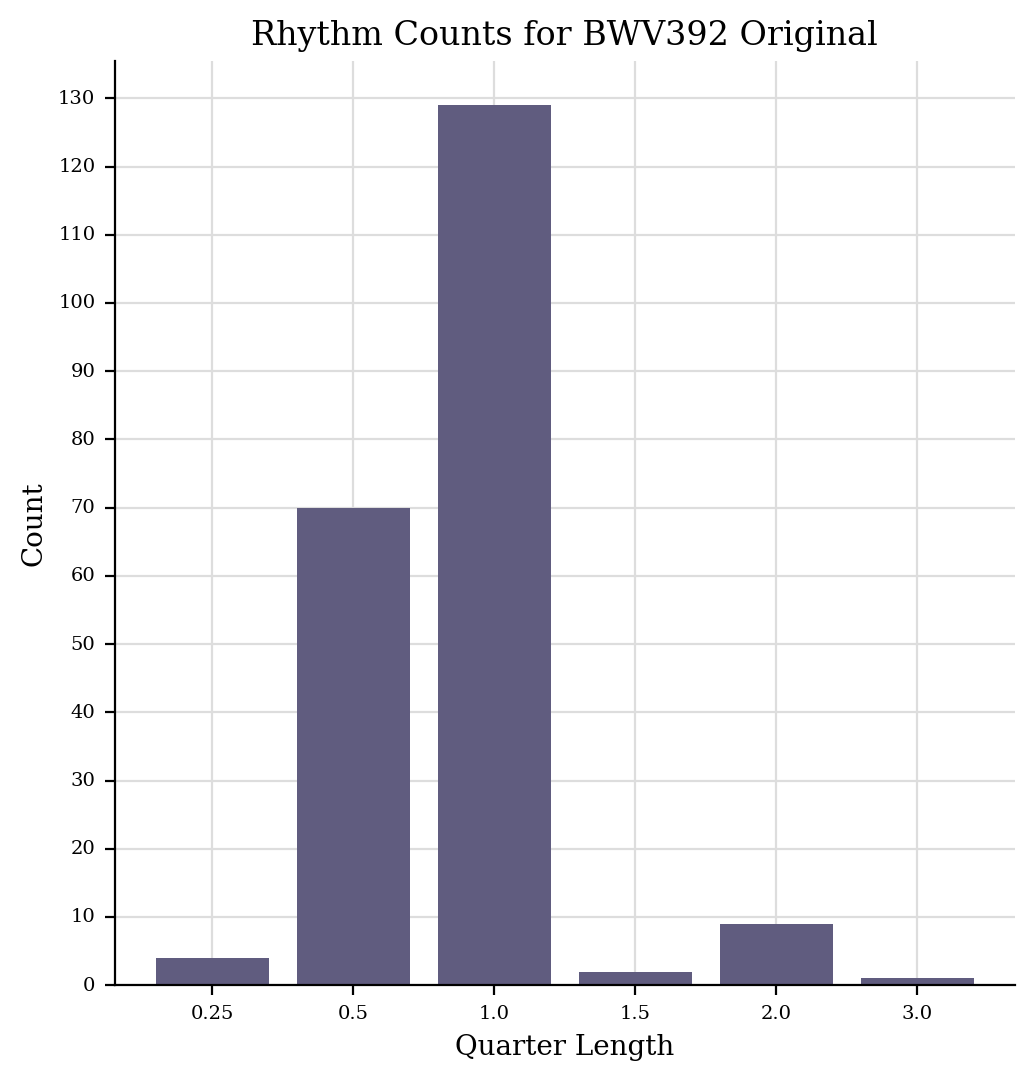

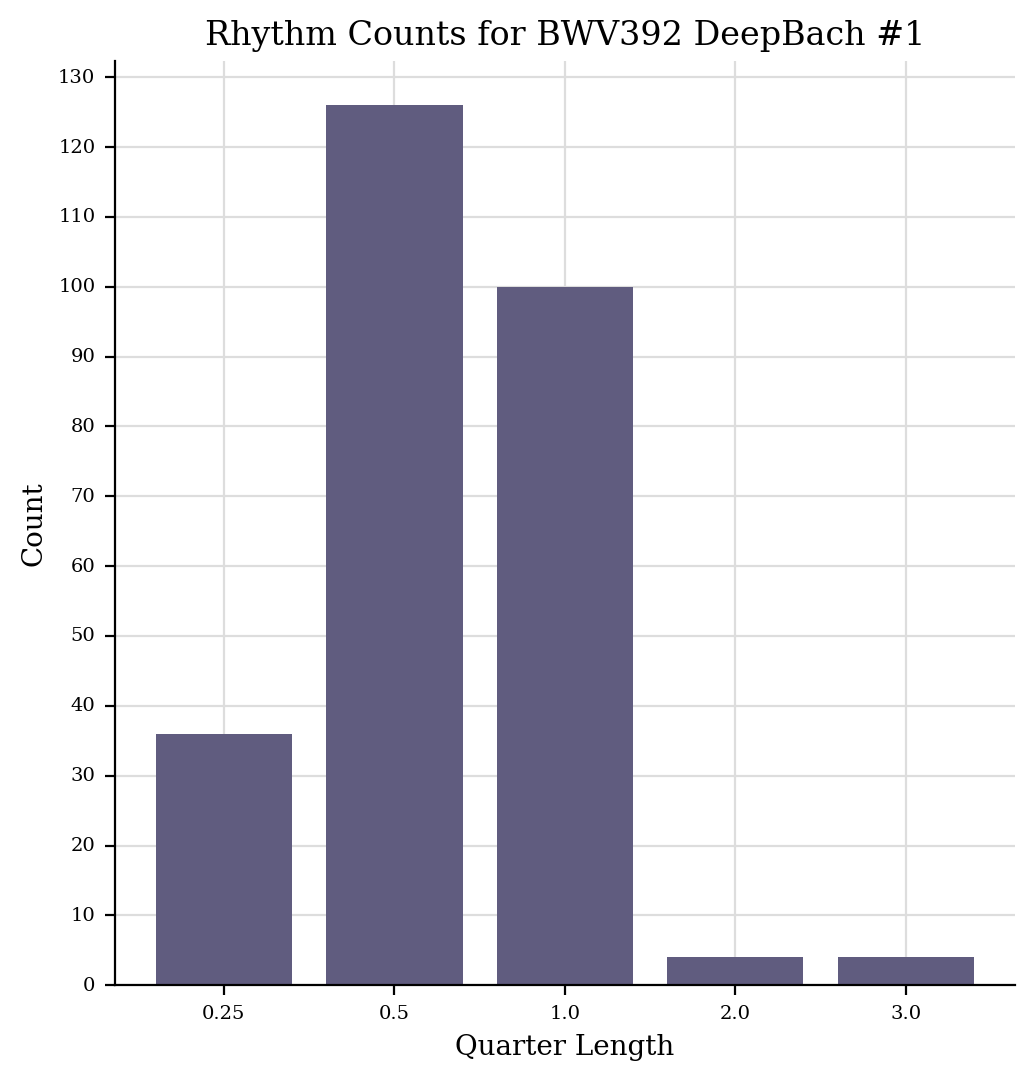

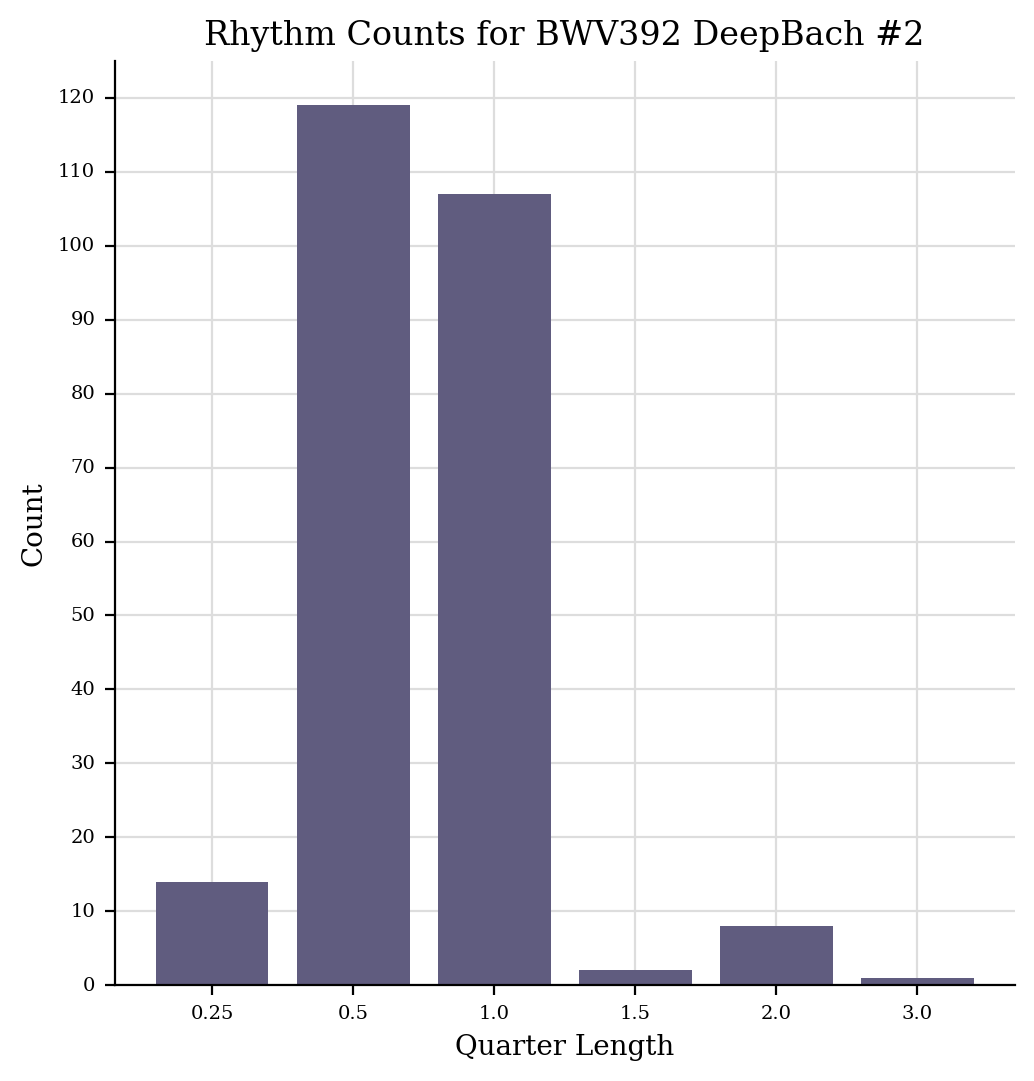

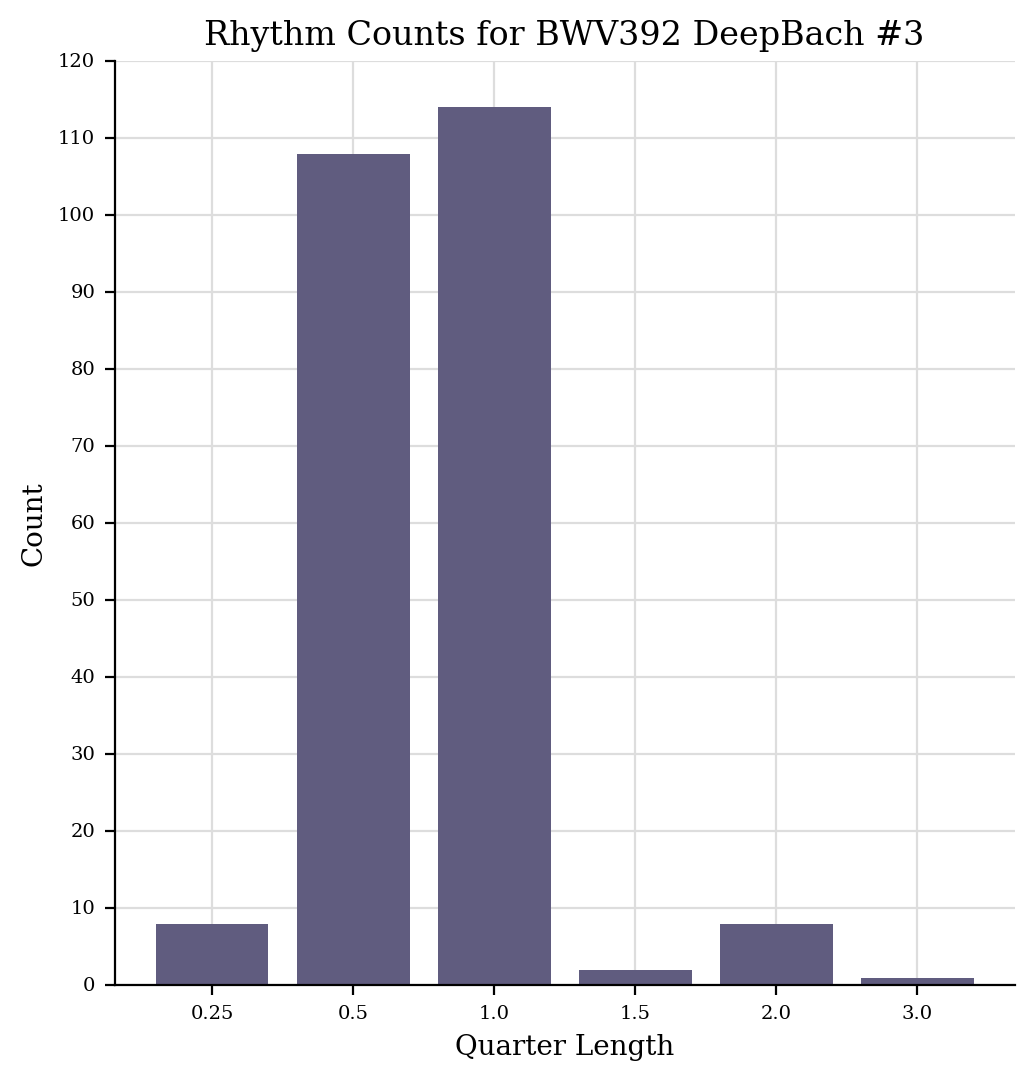

In [44]:
plot_rhythm_distributions(score_dict, 'Rhythm Counts for BWV392')

### Alto

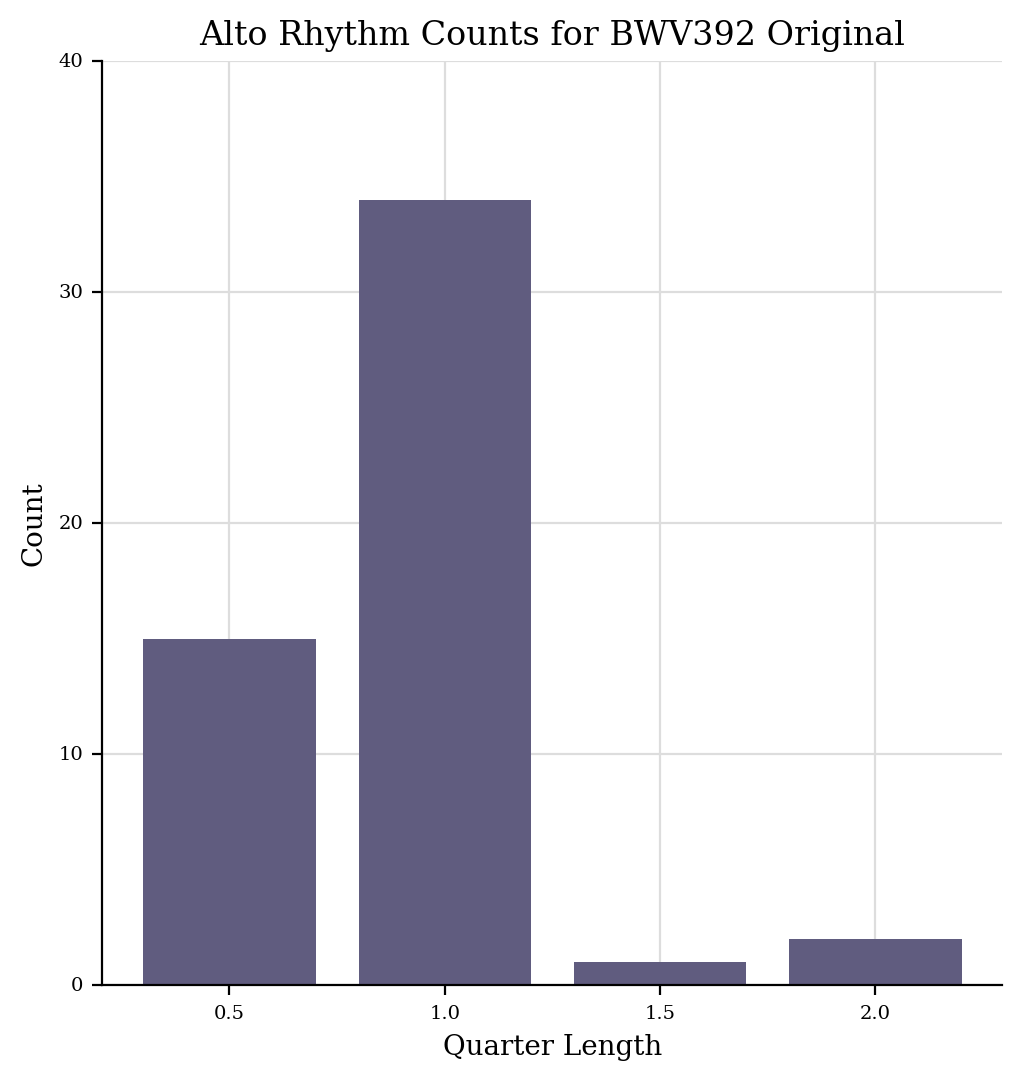

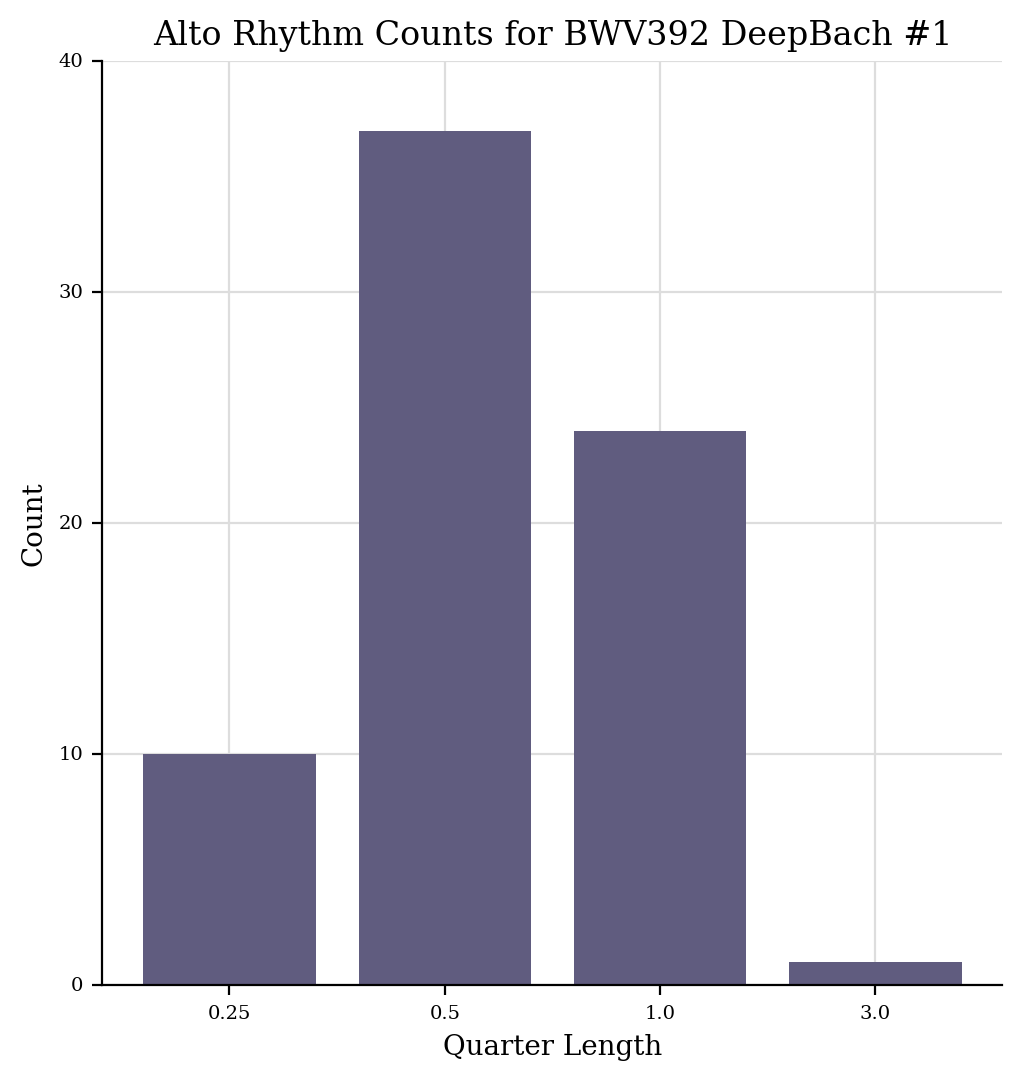

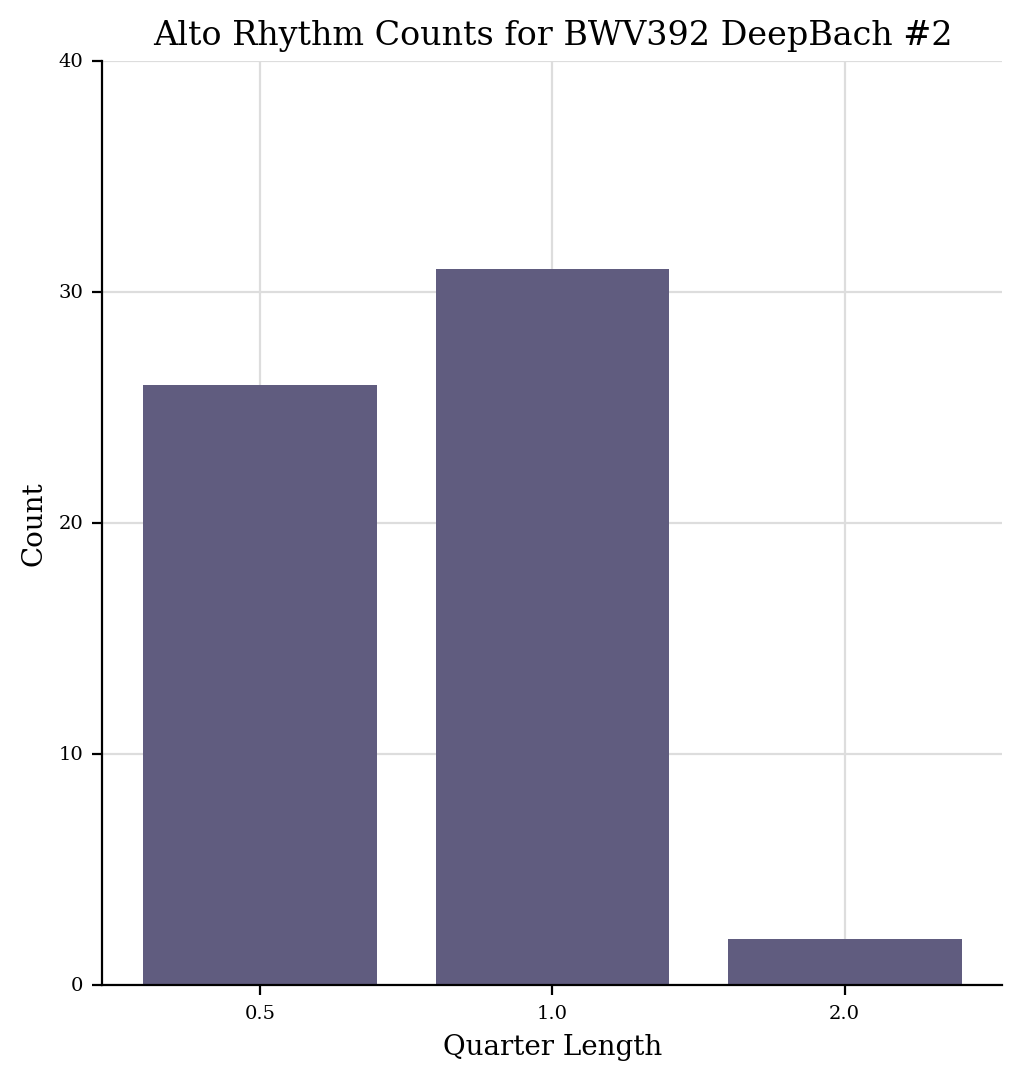

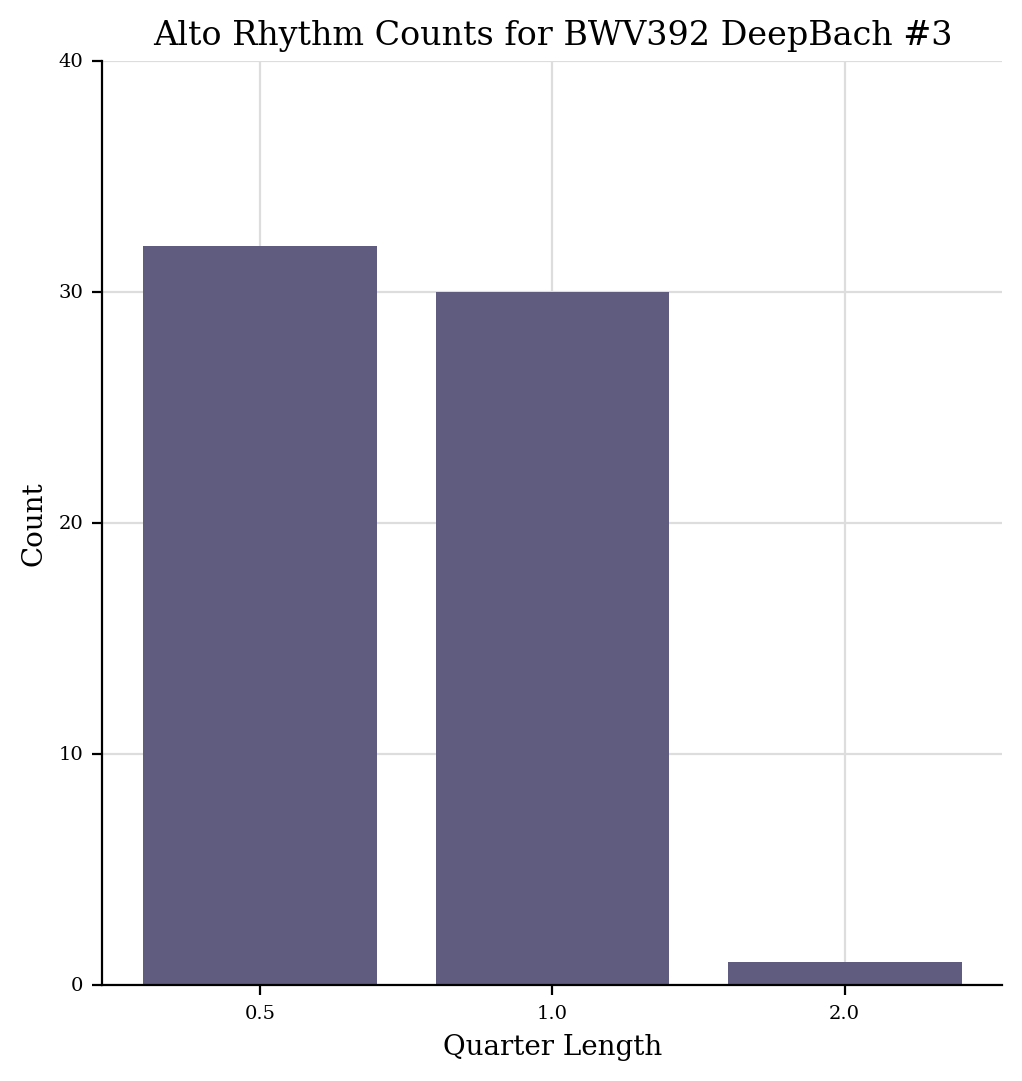

In [45]:
plot_rhythm_distributions(score_dict, 'Alto Rhythm Counts for BWV392', part='A')

### Tenor

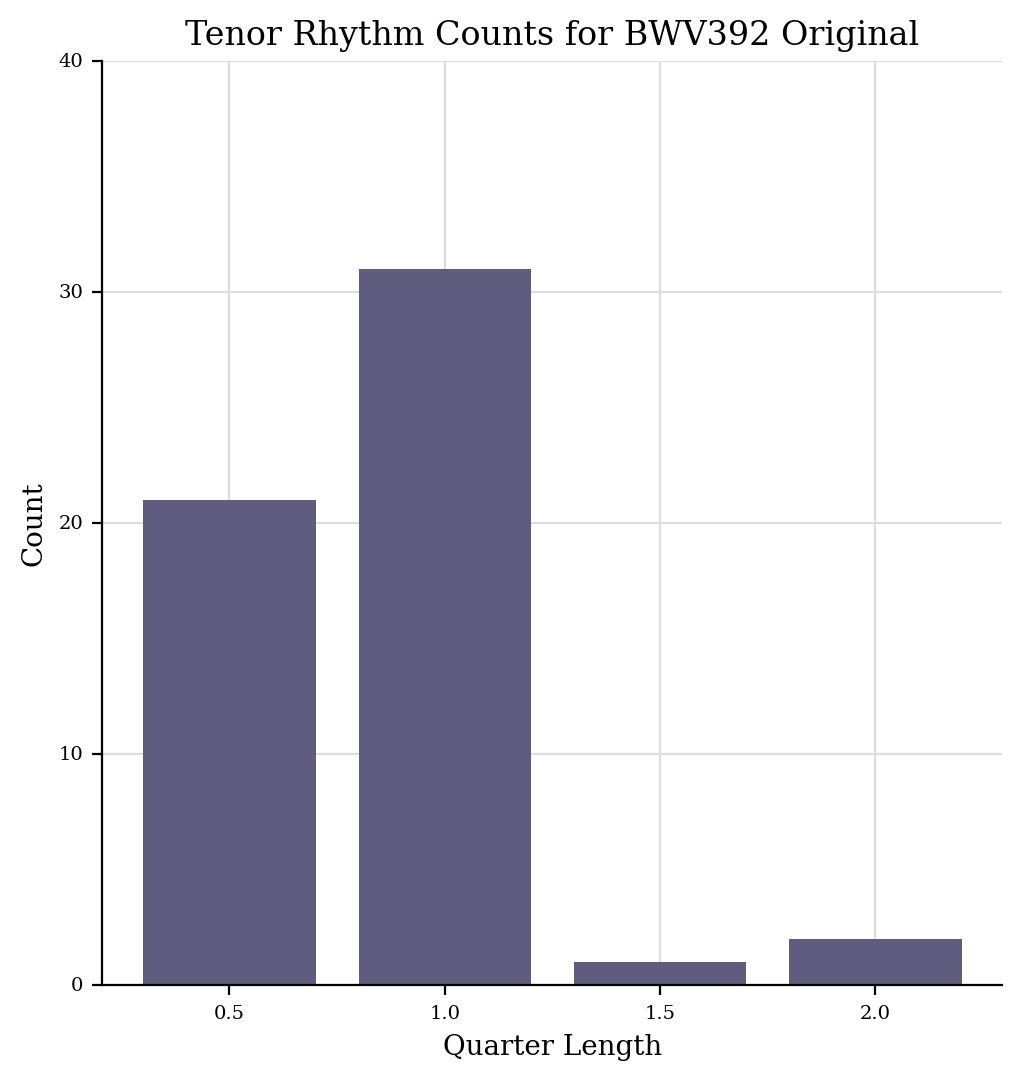

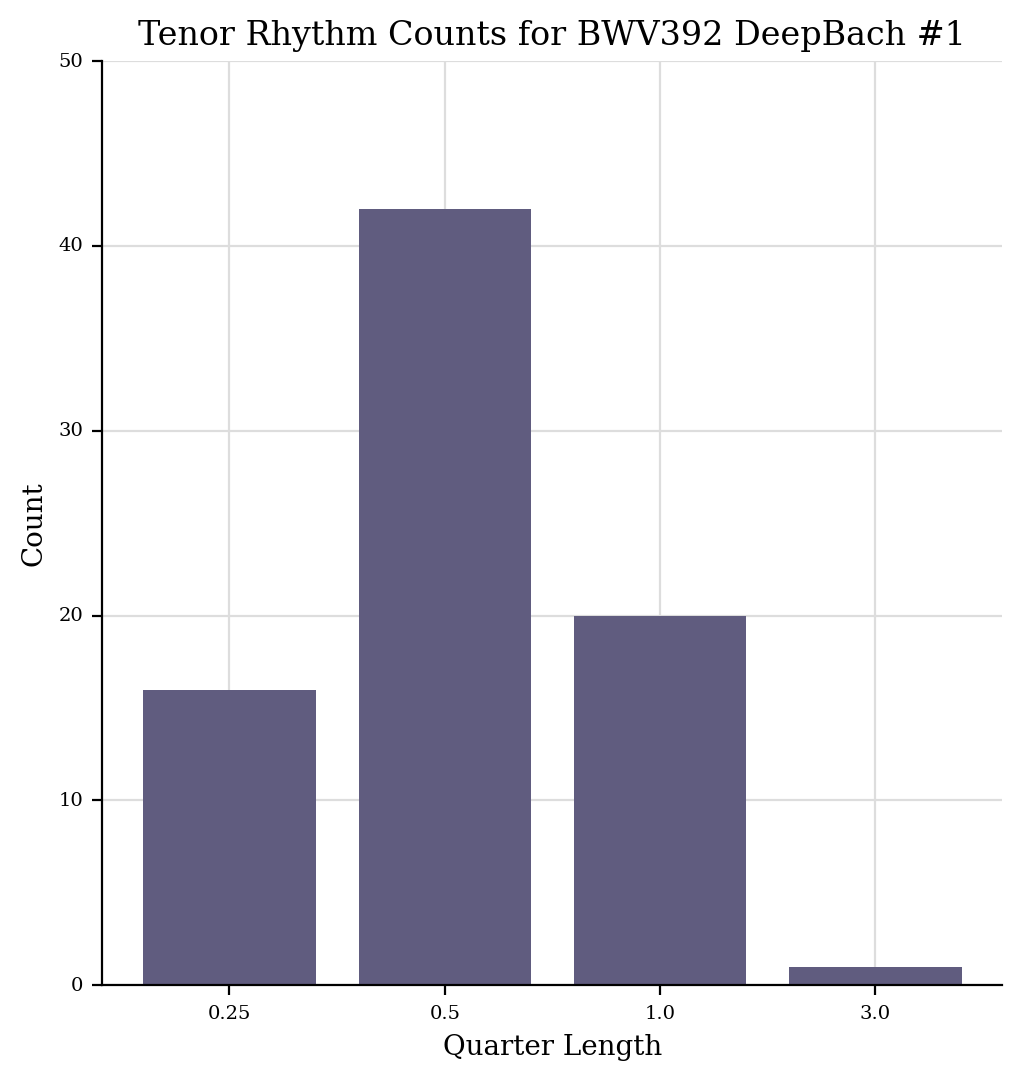

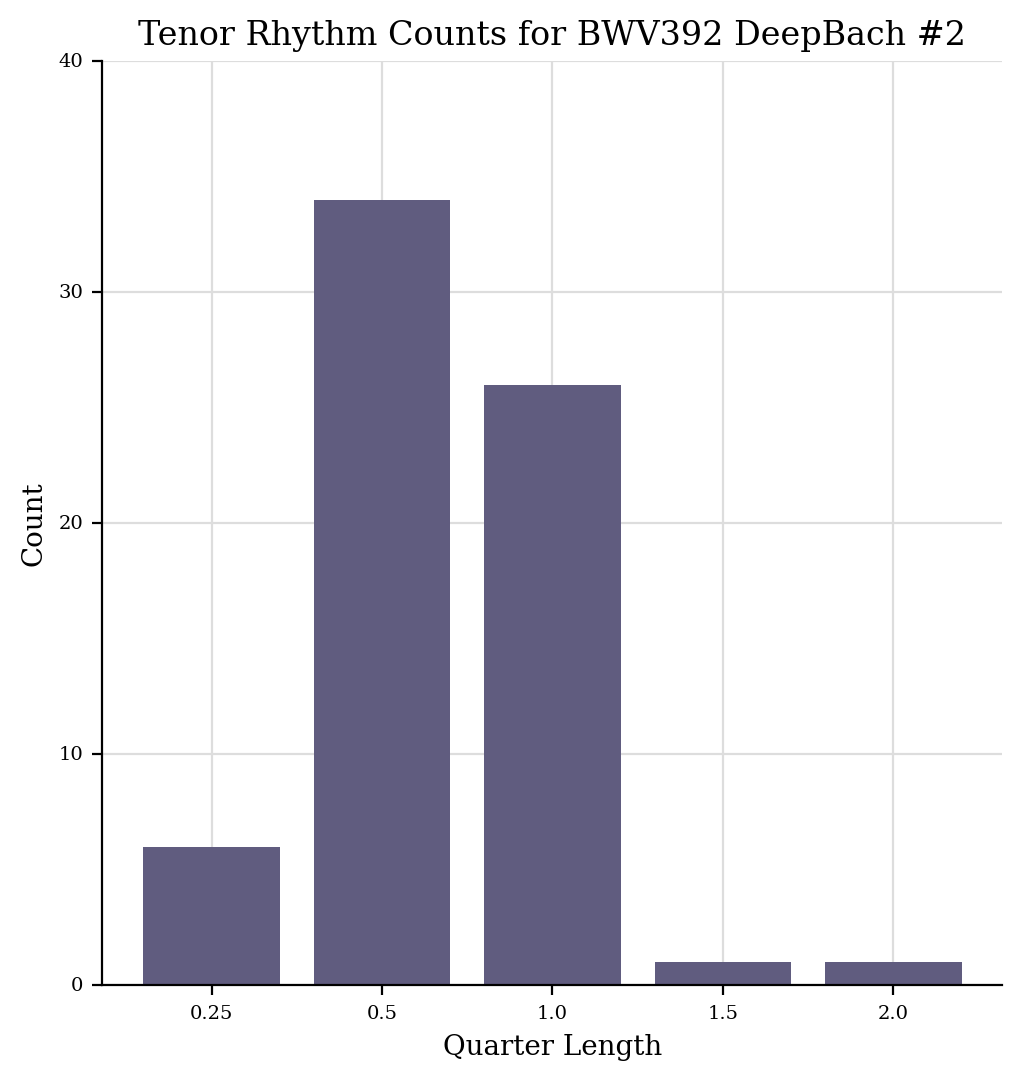

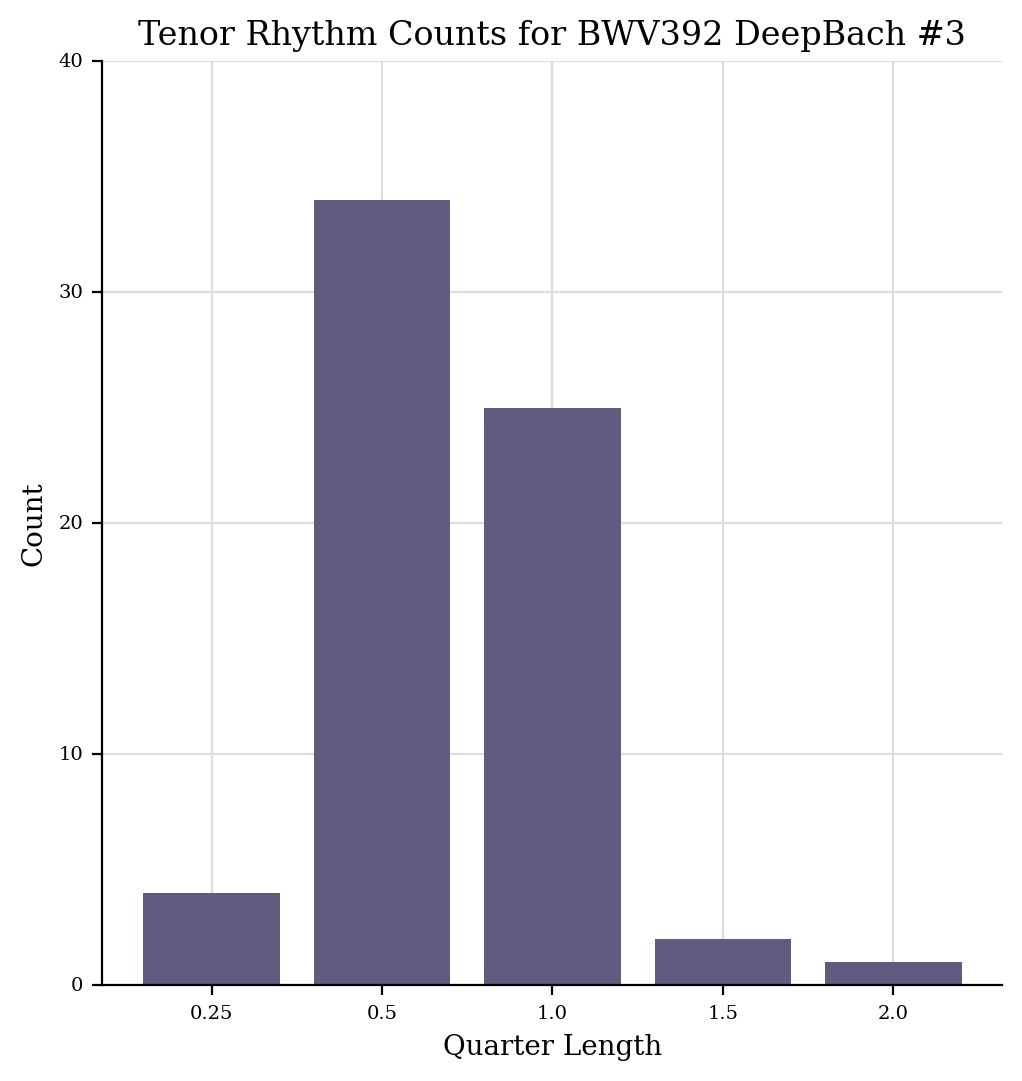

In [46]:
plot_rhythm_distributions(score_dict, 'Tenor Rhythm Counts for BWV392', part='T')

### Bass

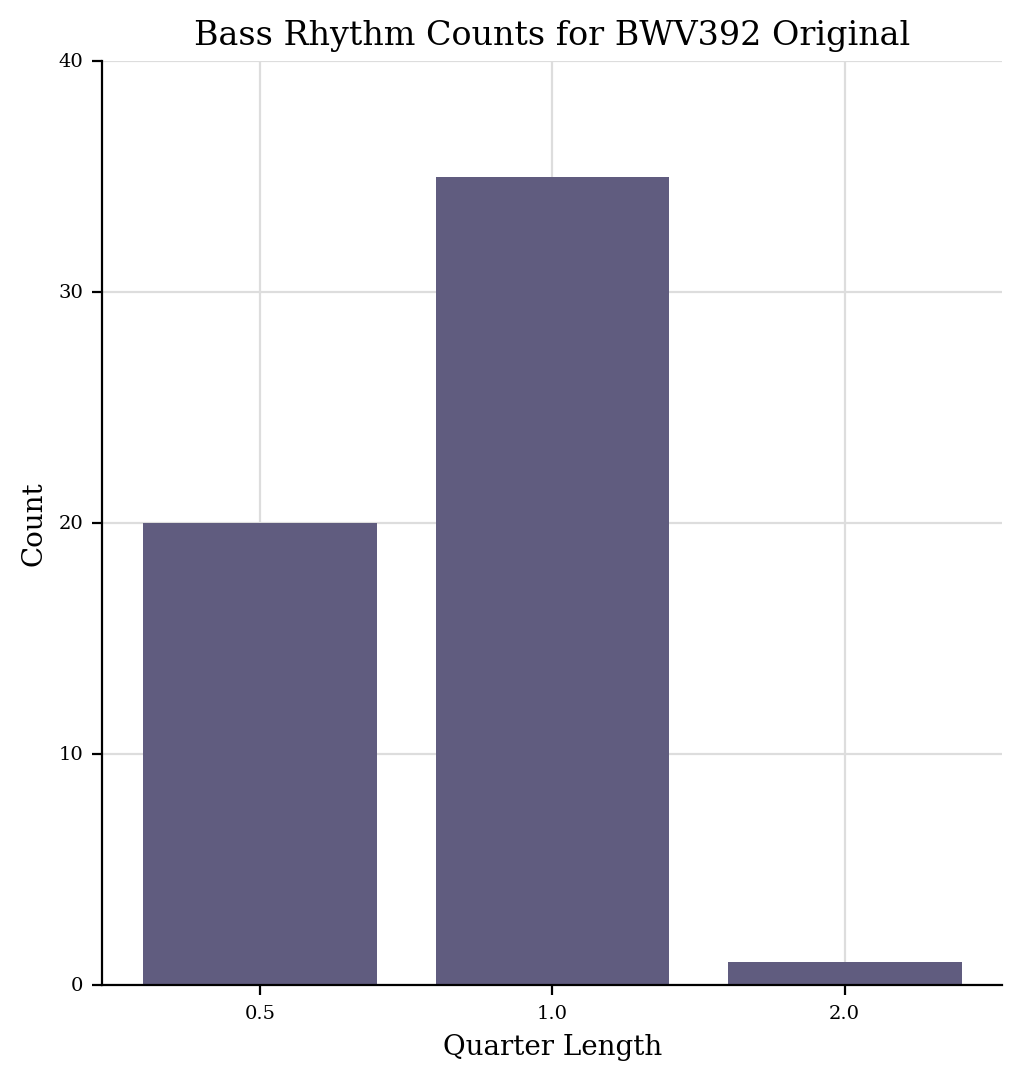

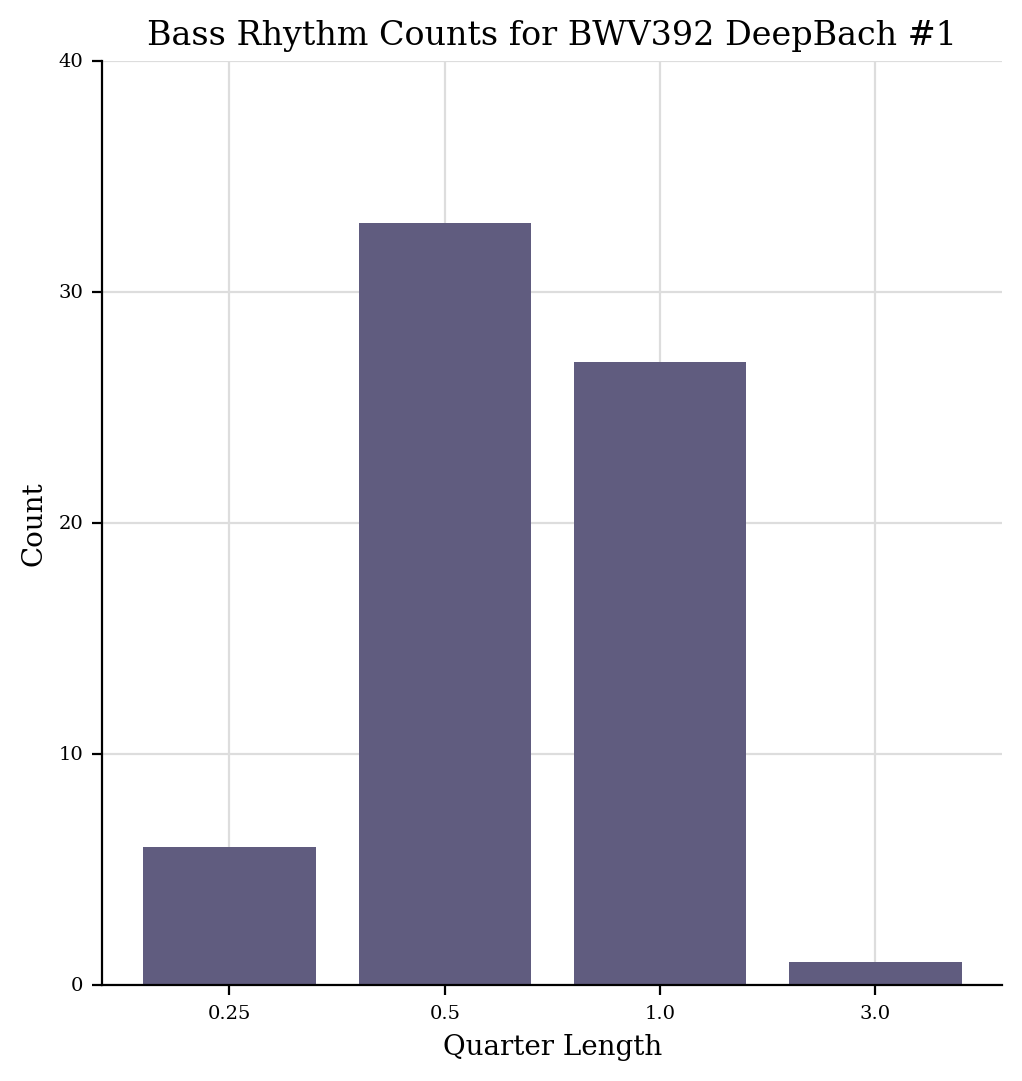

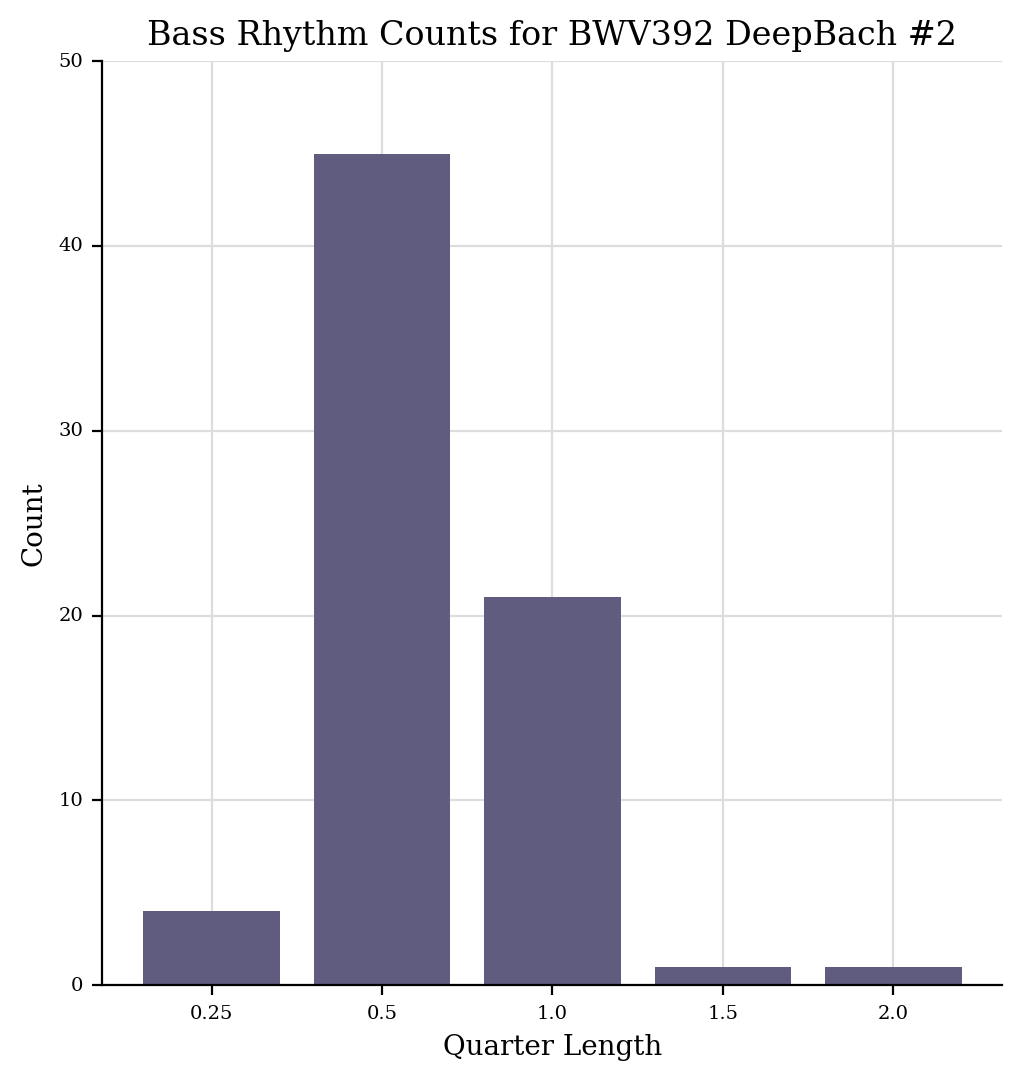

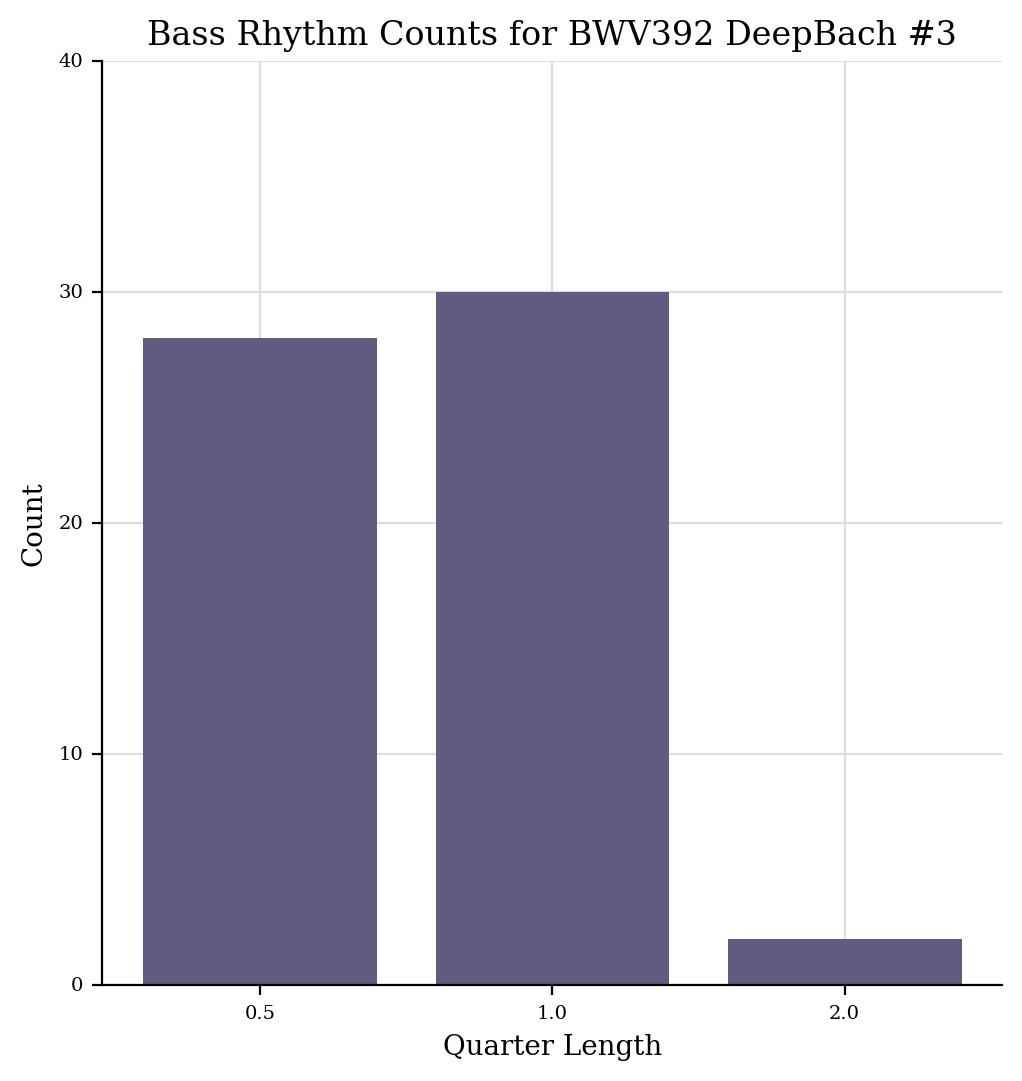

In [47]:
plot_rhythm_distributions(score_dict, 'Bass Rhythm Counts for BWV392', part='B')

## Pitch VS Quarter Length

This graph is a **weighted scatterplot**. The size of the bubble indicates the number of occurrences that a given pitch lasted for a specific number of quarter notes. A larger bubble means that occurred more times.

### Helper Function

In [48]:
def plot_pitch_rhythm_distributions(score_dict, title, part=None):
    graphs = []
    
    for key in score_dict.keys():
        if part is not None:
            graphs.append(score_dict[key].parts[part].plot('scatterweighted', 'pitch', 'duration', xHideUnused=False, yAxisLabel='Quarter Note Length', title=f'{title} {key}').figure)
        else:
            graphs.append(score_dict[key].plot('scatterweighted', 'pitch', 'duration', xHideUnused=False, yAxisLabel='Quarter Note Length', title=f'{title} {key}').figure)

    for g in graphs:
        display(g)

### All Parts

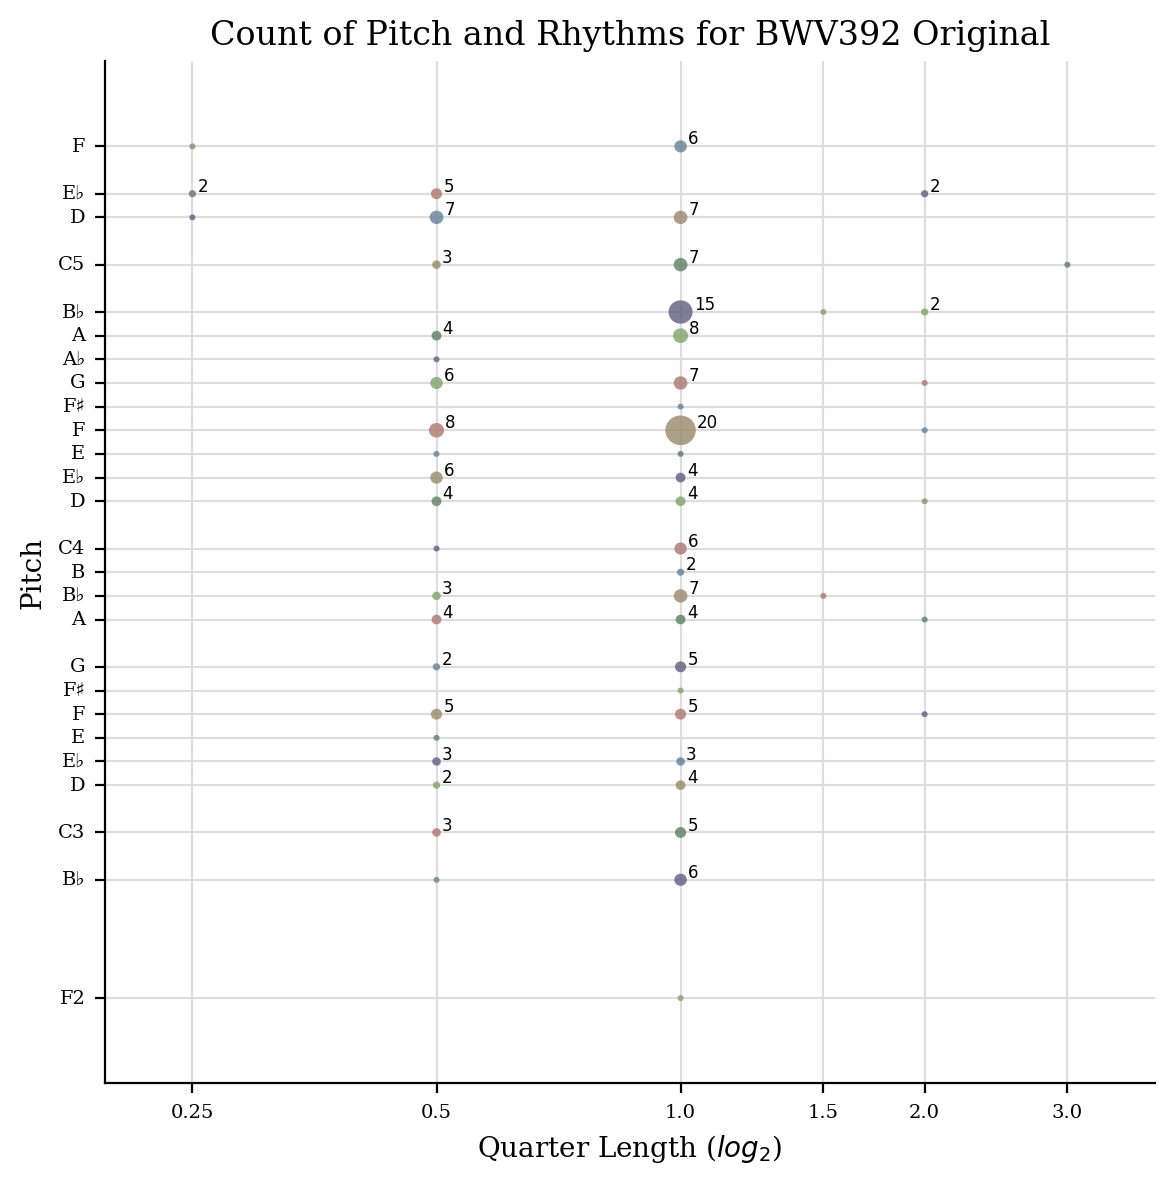

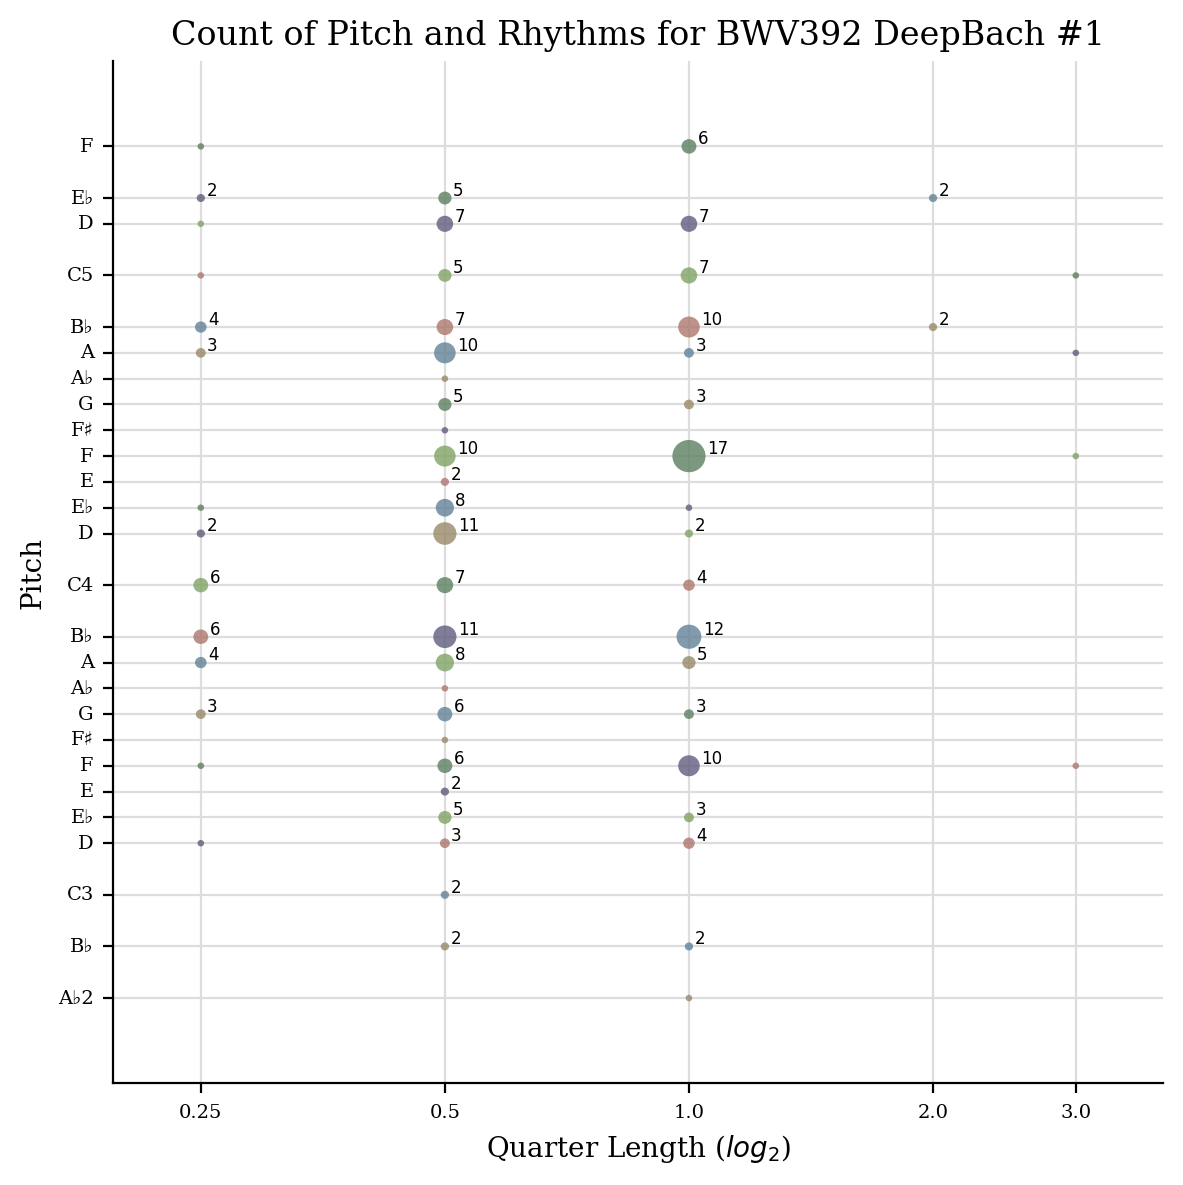

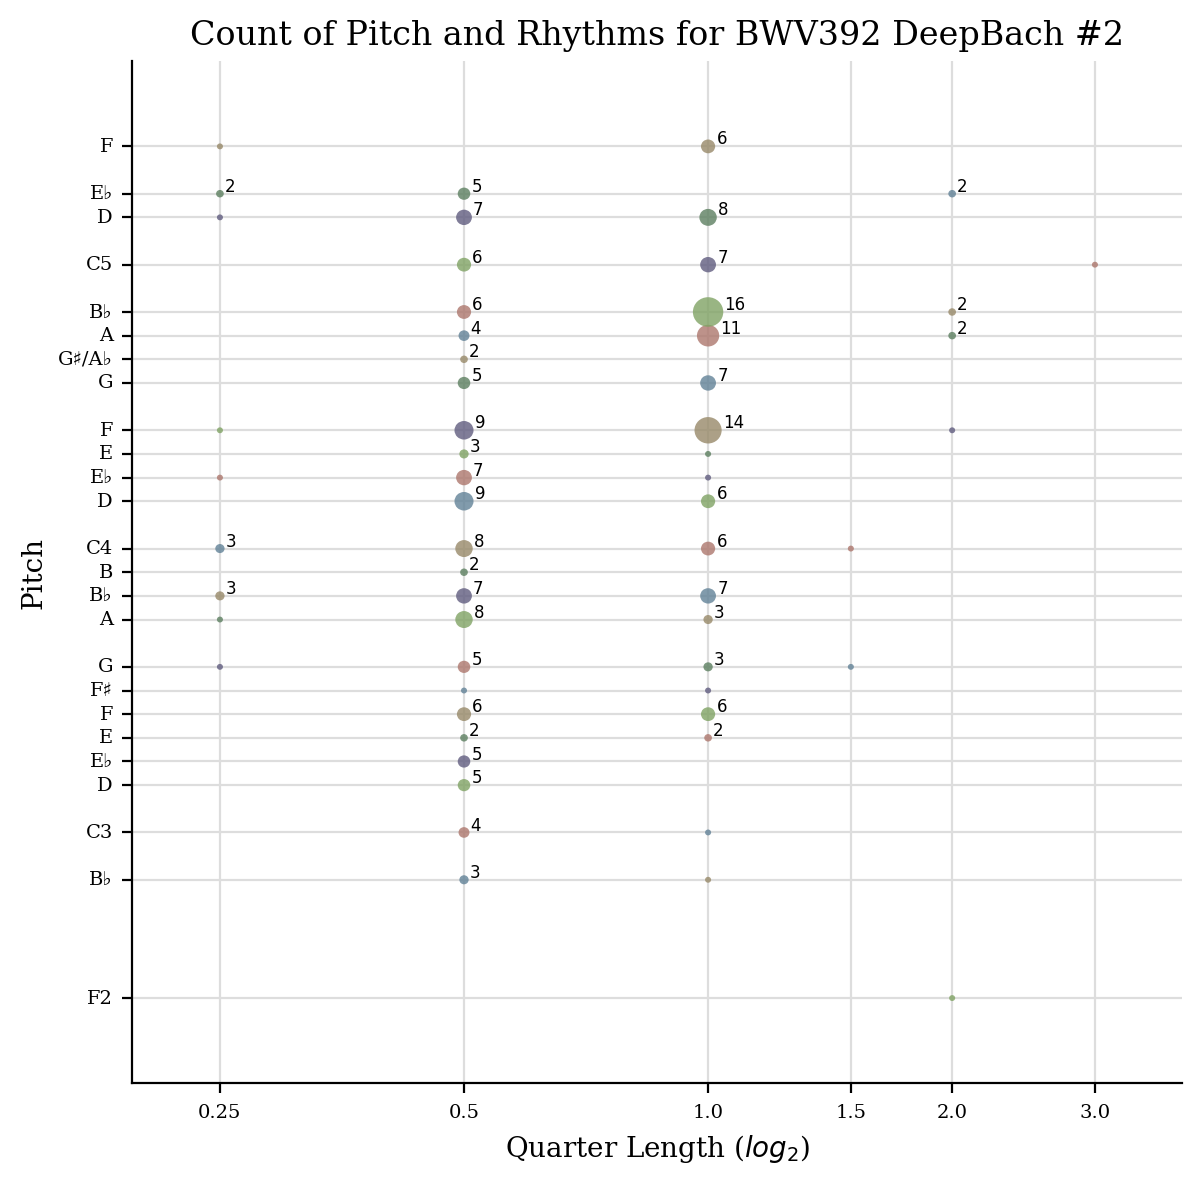

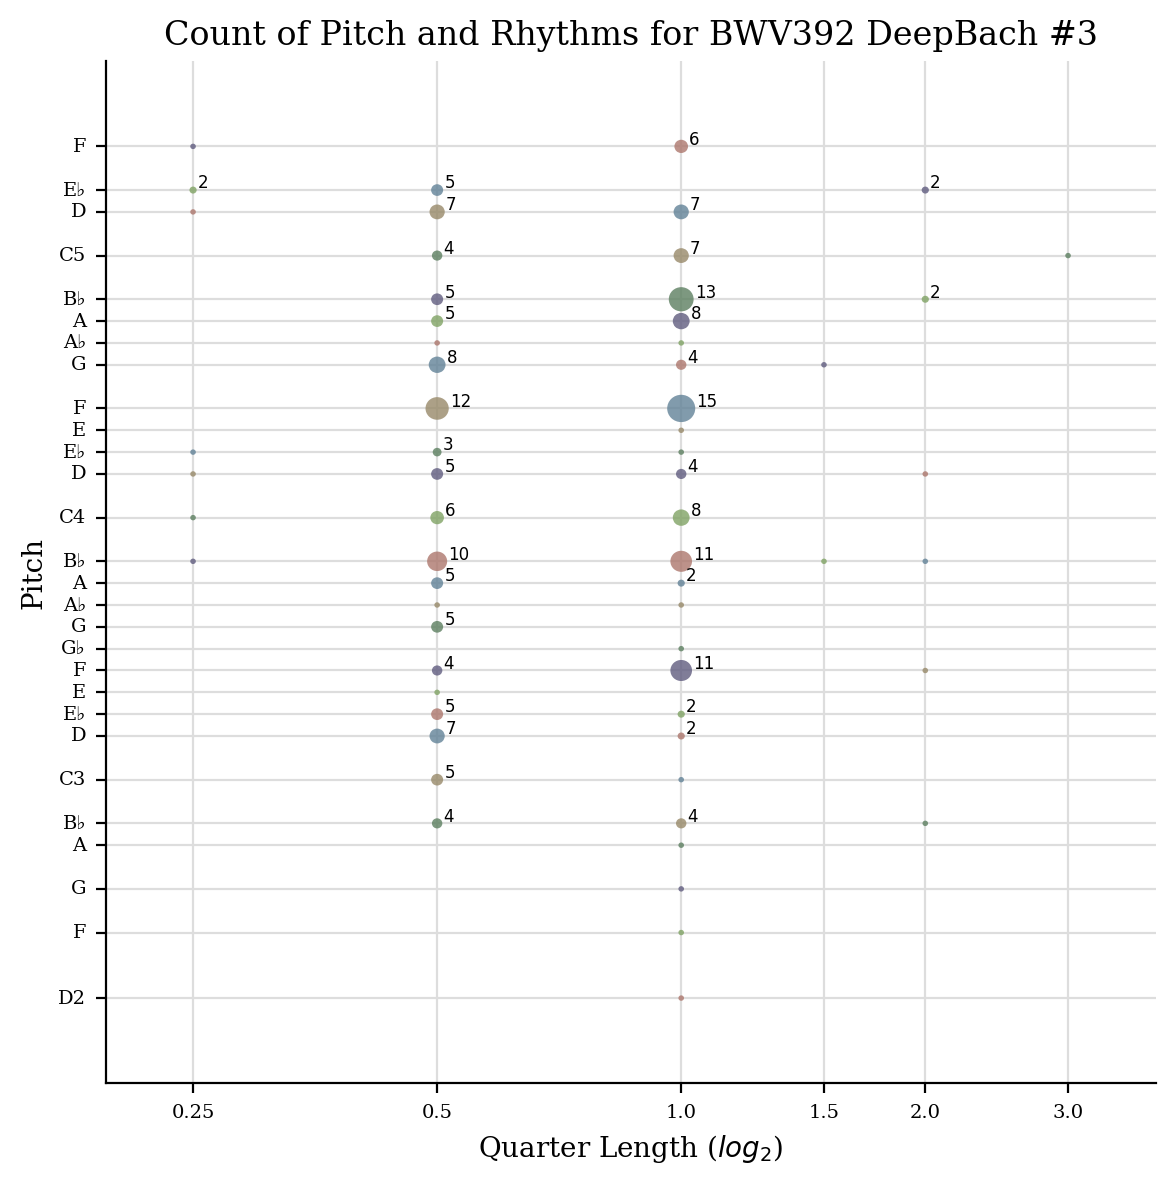

In [49]:
plot_pitch_rhythm_distributions(score_dict, 'Count of Pitch and Rhythms for BWV392')

### Alto

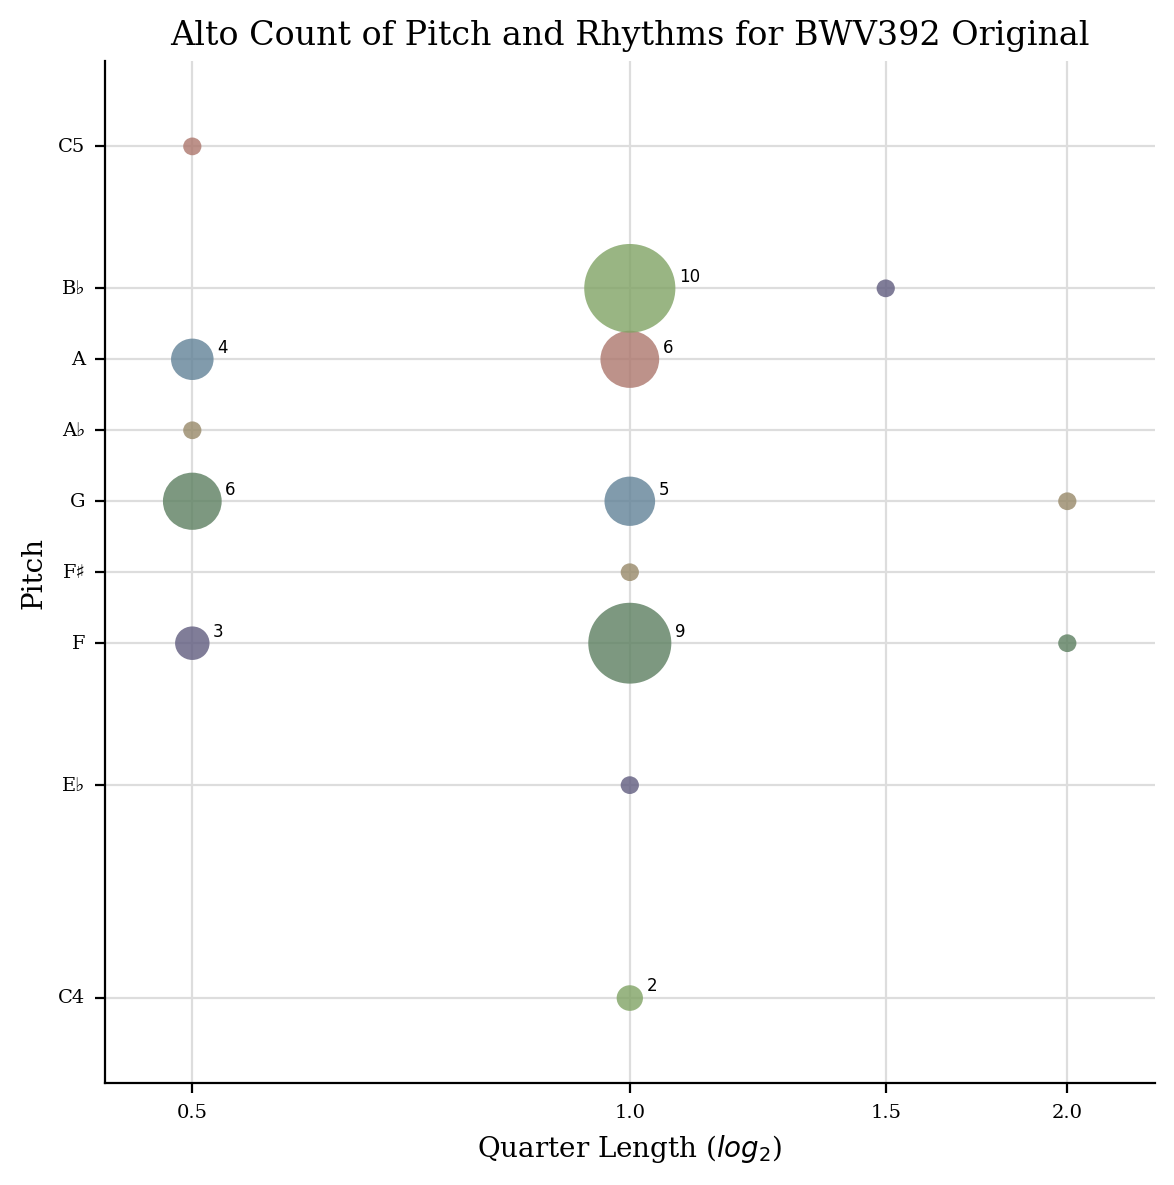

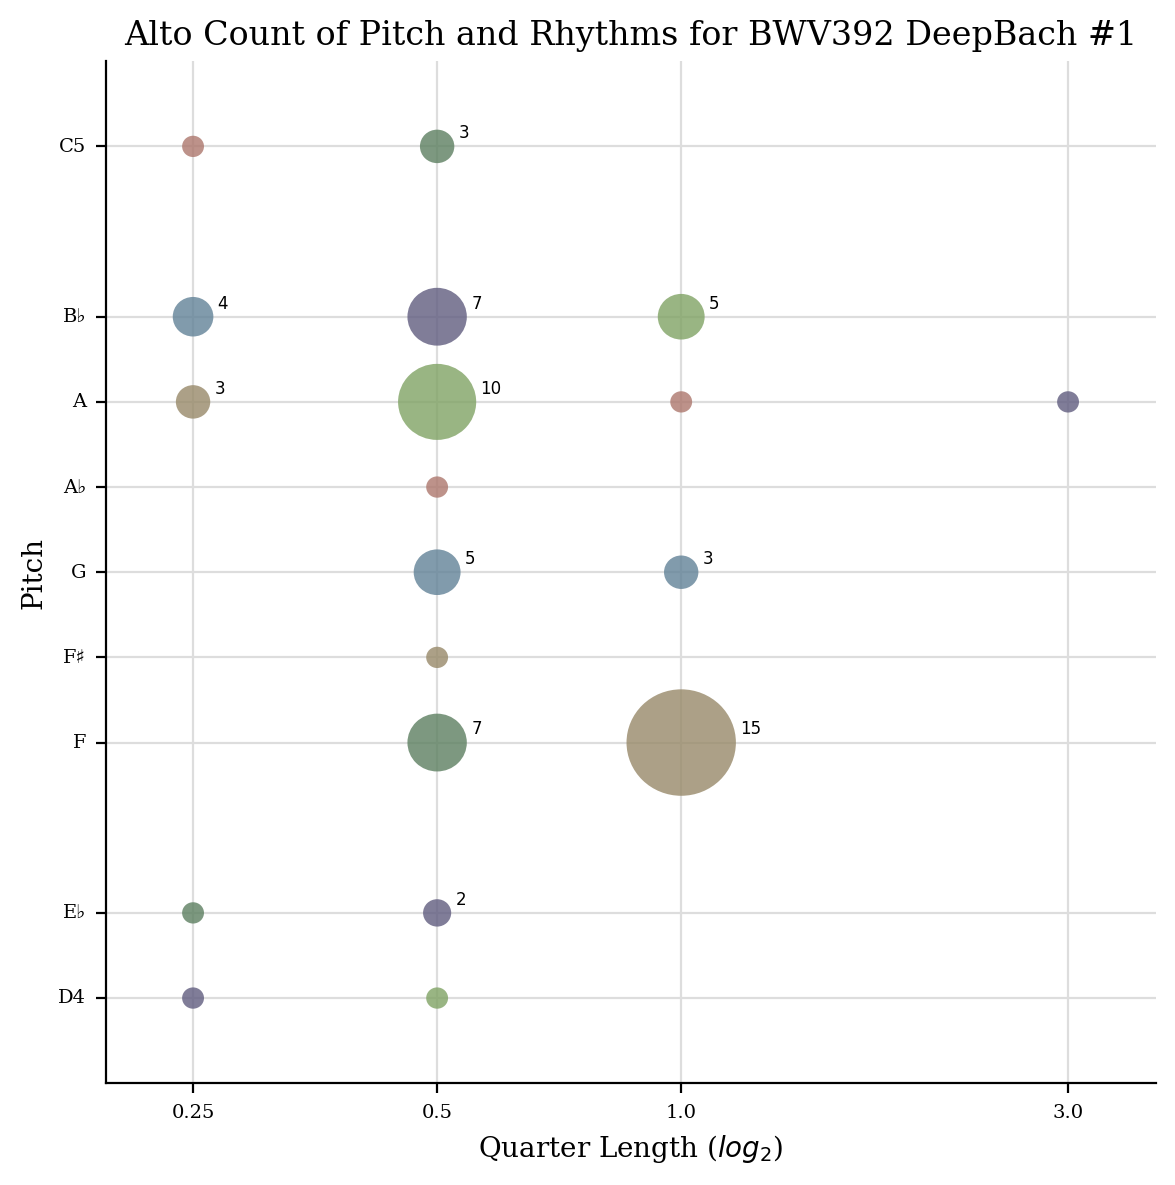

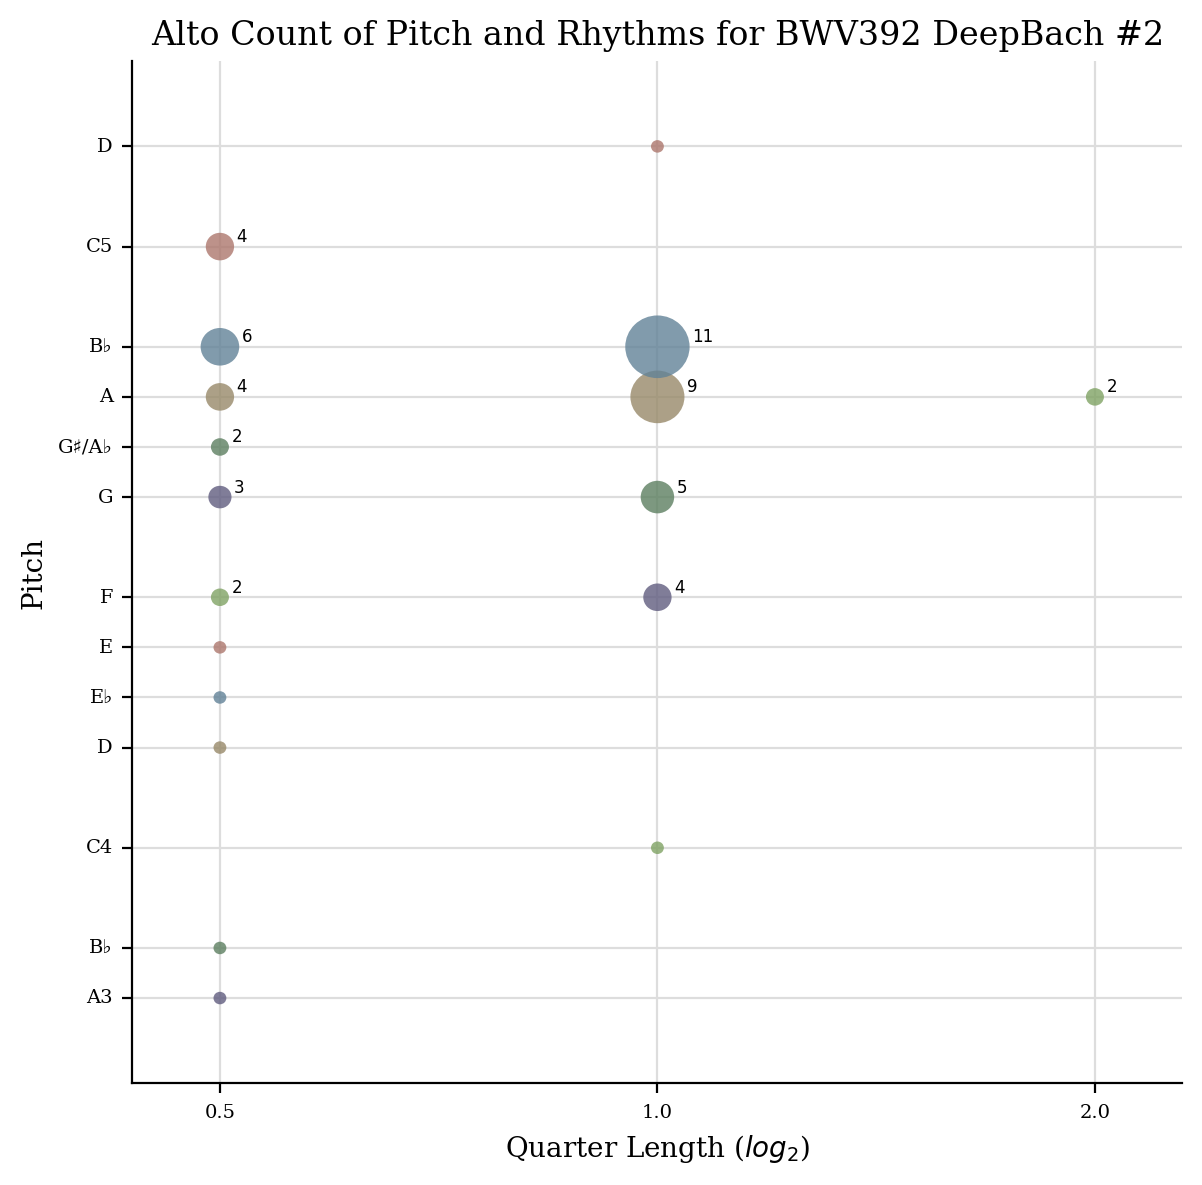

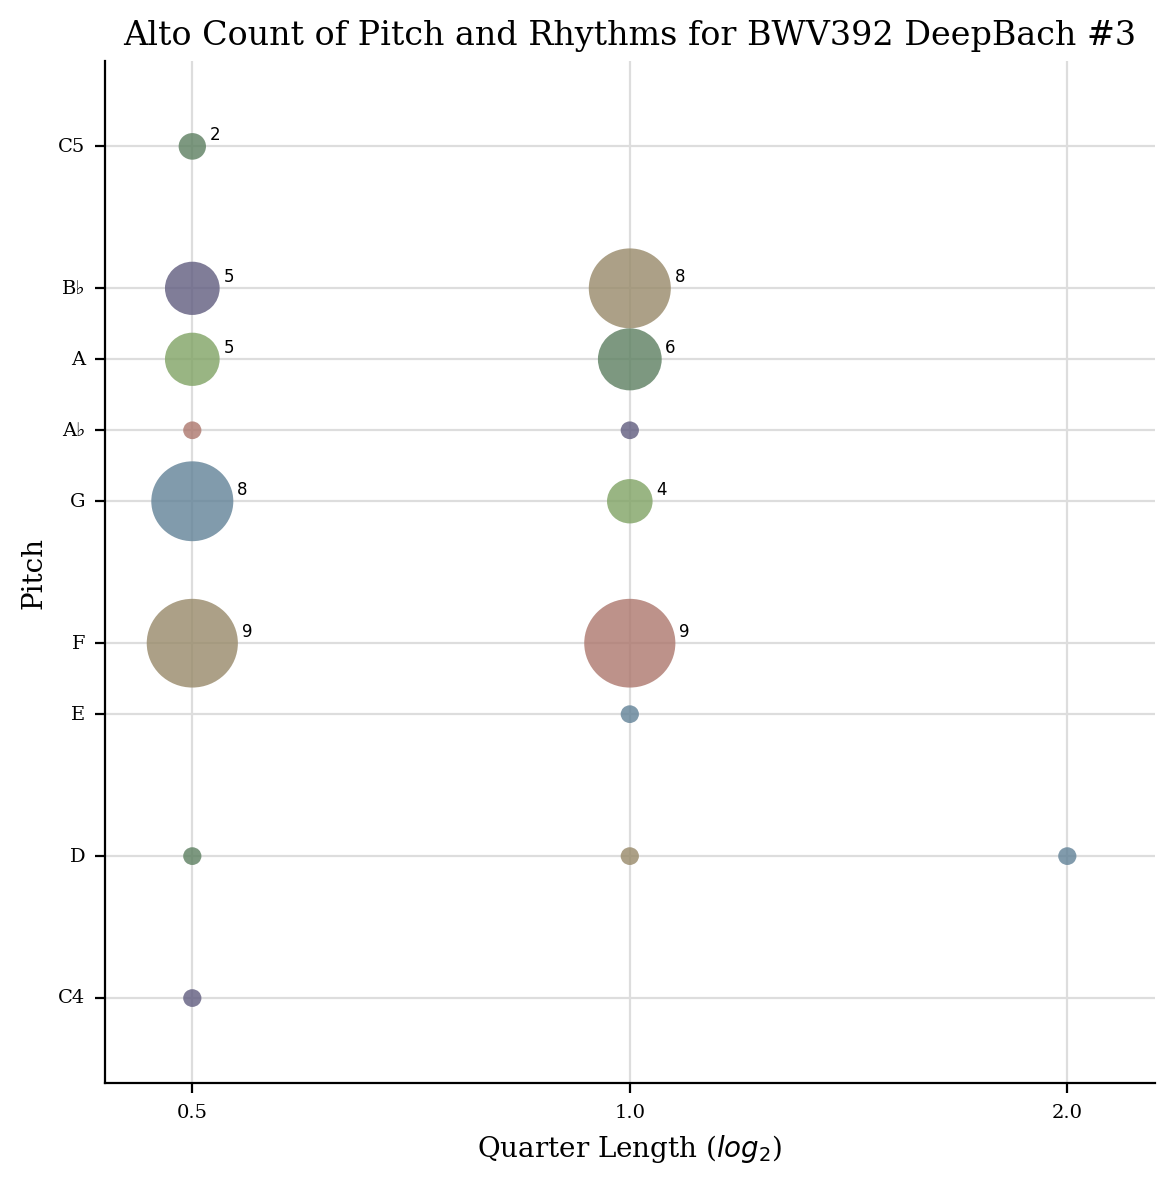

In [50]:
plot_pitch_rhythm_distributions(score_dict, 'Alto Count of Pitch and Rhythms for BWV392', part='A')

### Tenor

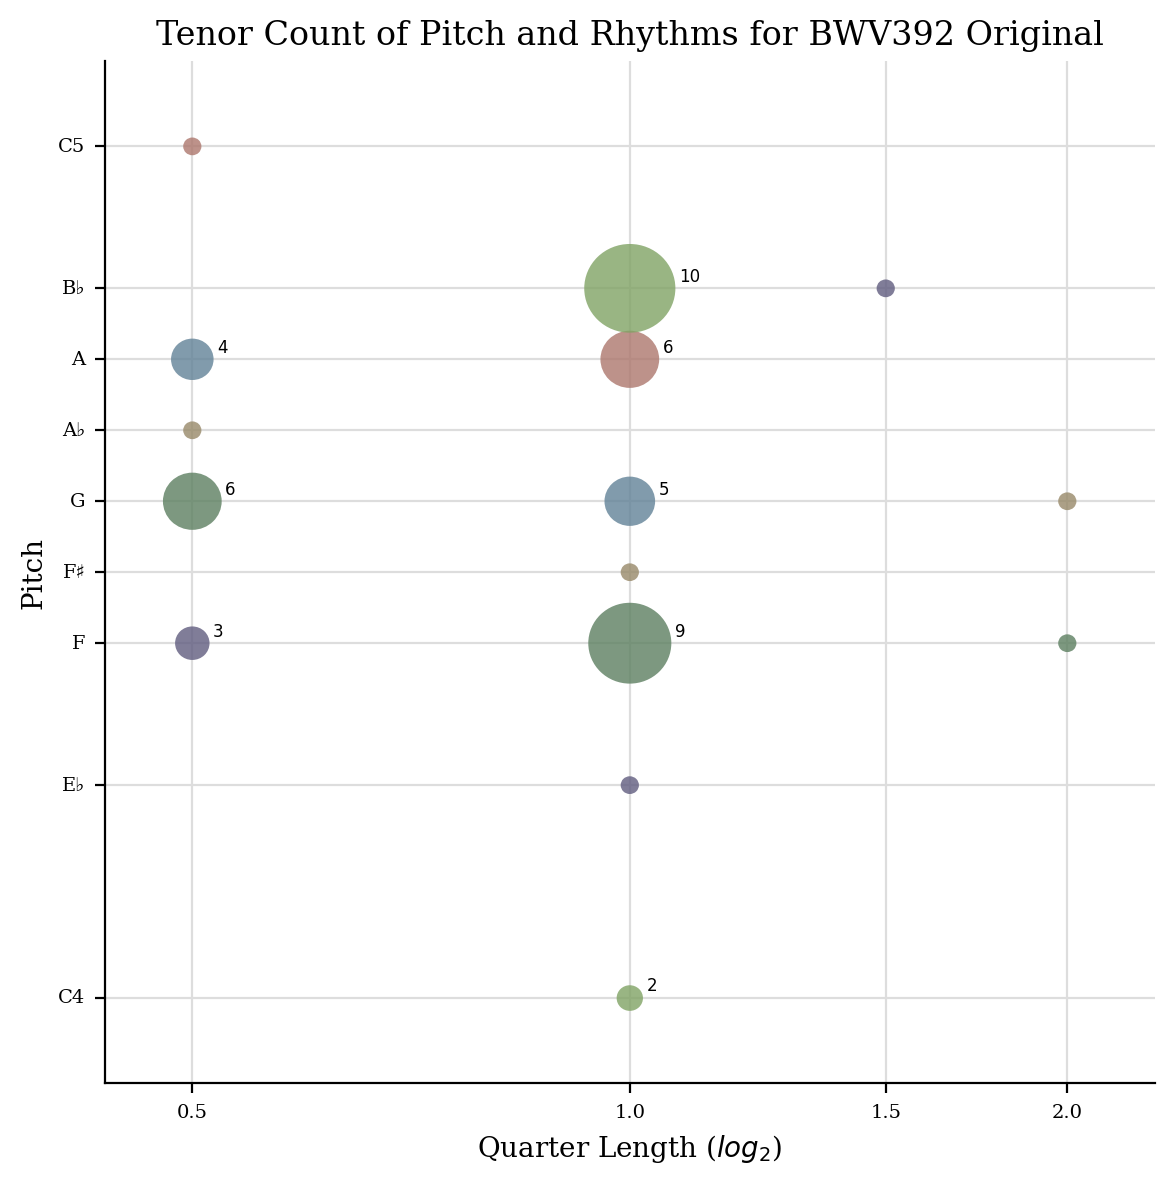

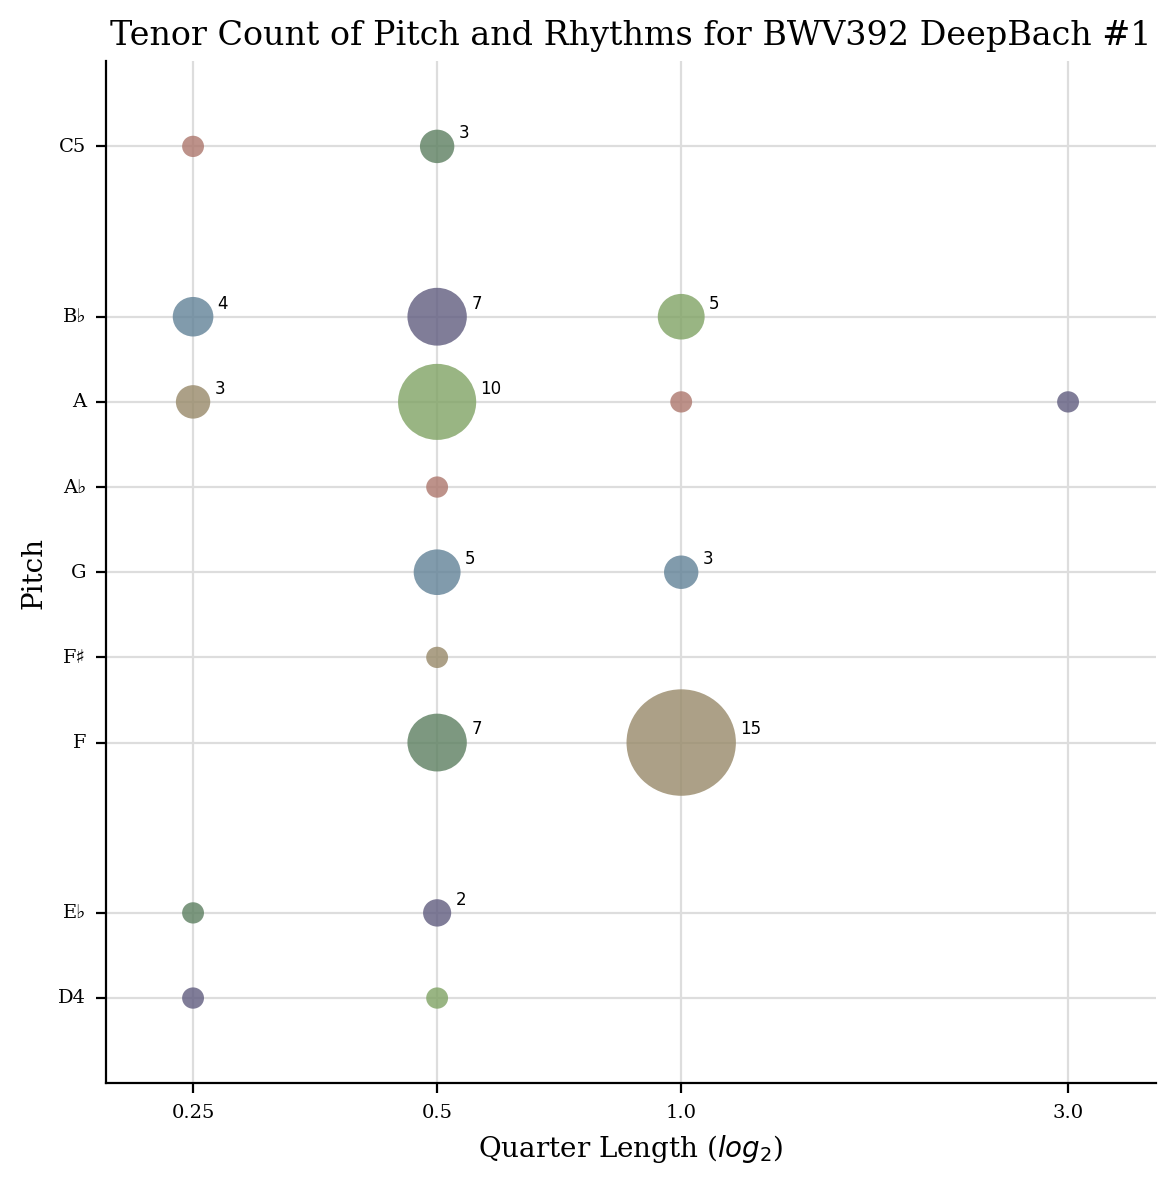

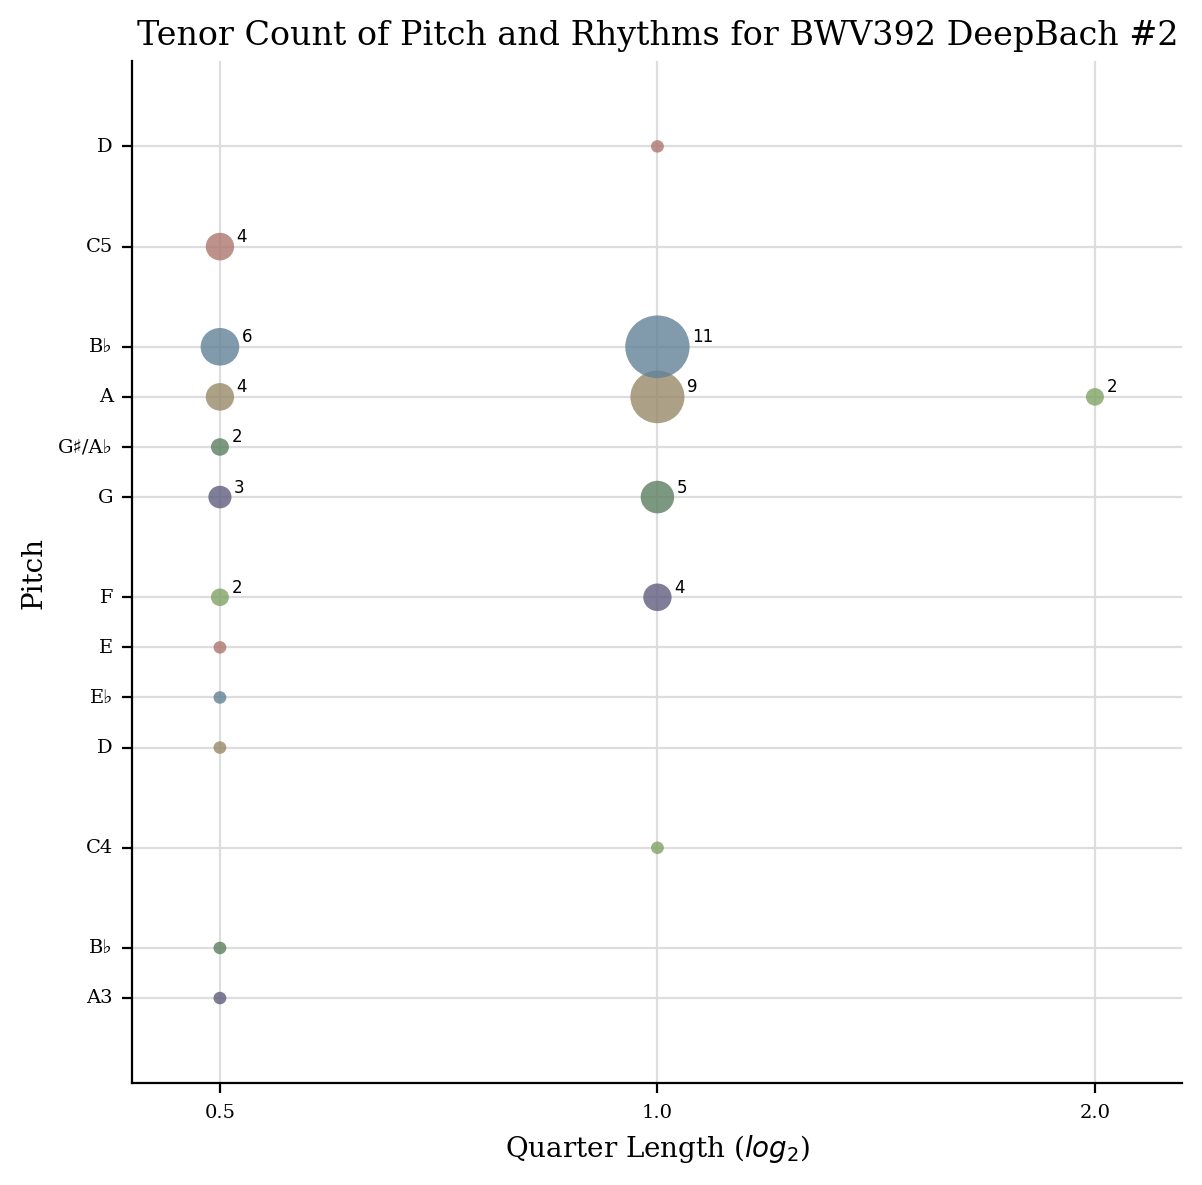

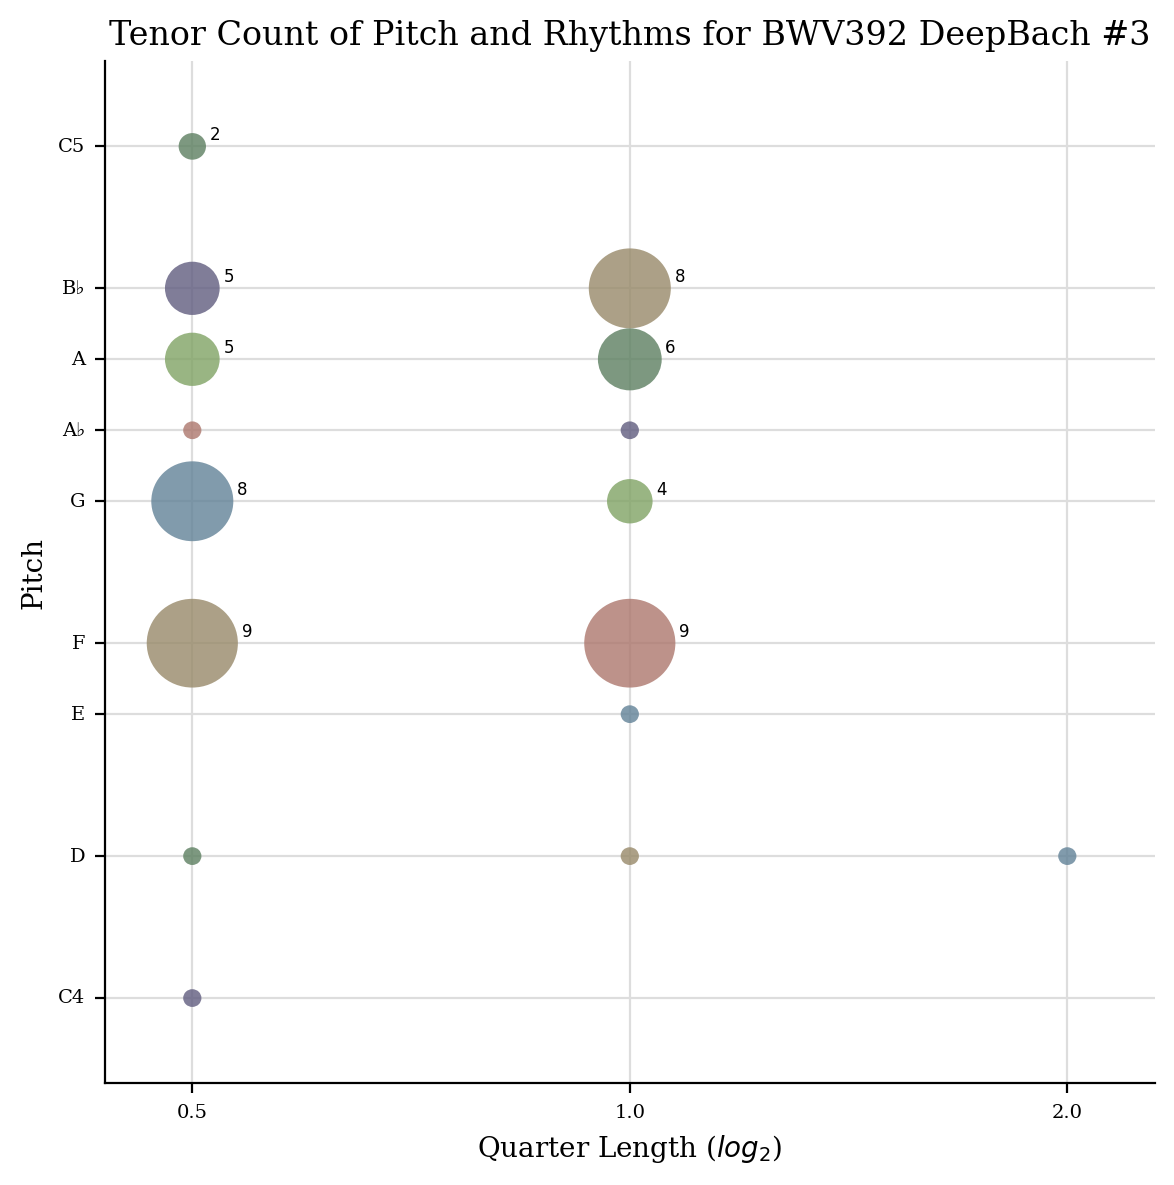

In [51]:
plot_pitch_rhythm_distributions(score_dict, 'Tenor Count of Pitch and Rhythms for BWV392', part='A')

### Bass

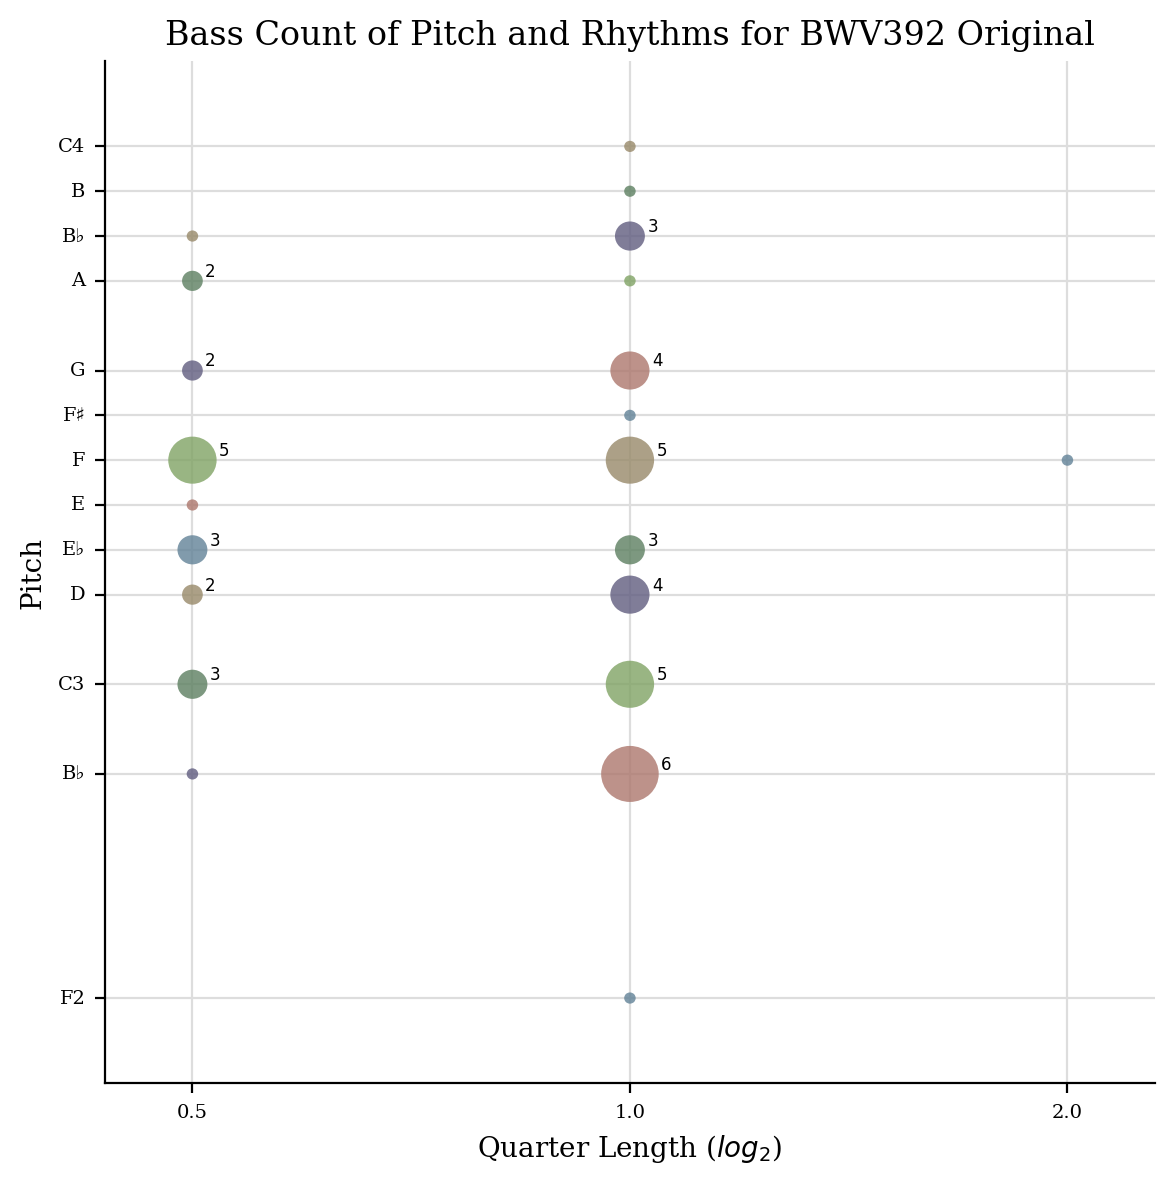

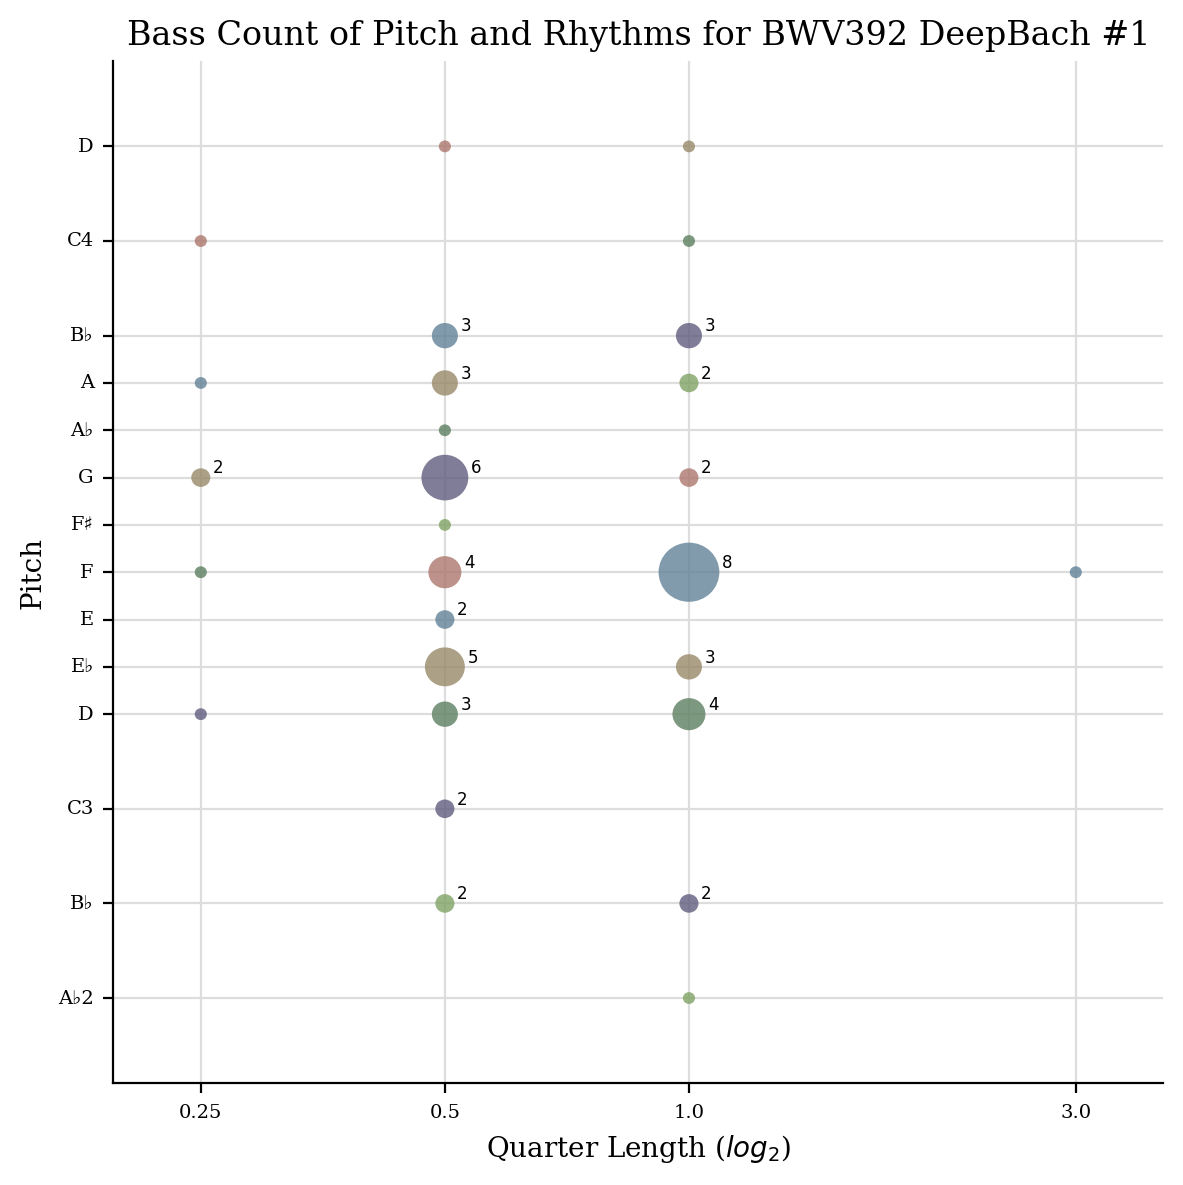

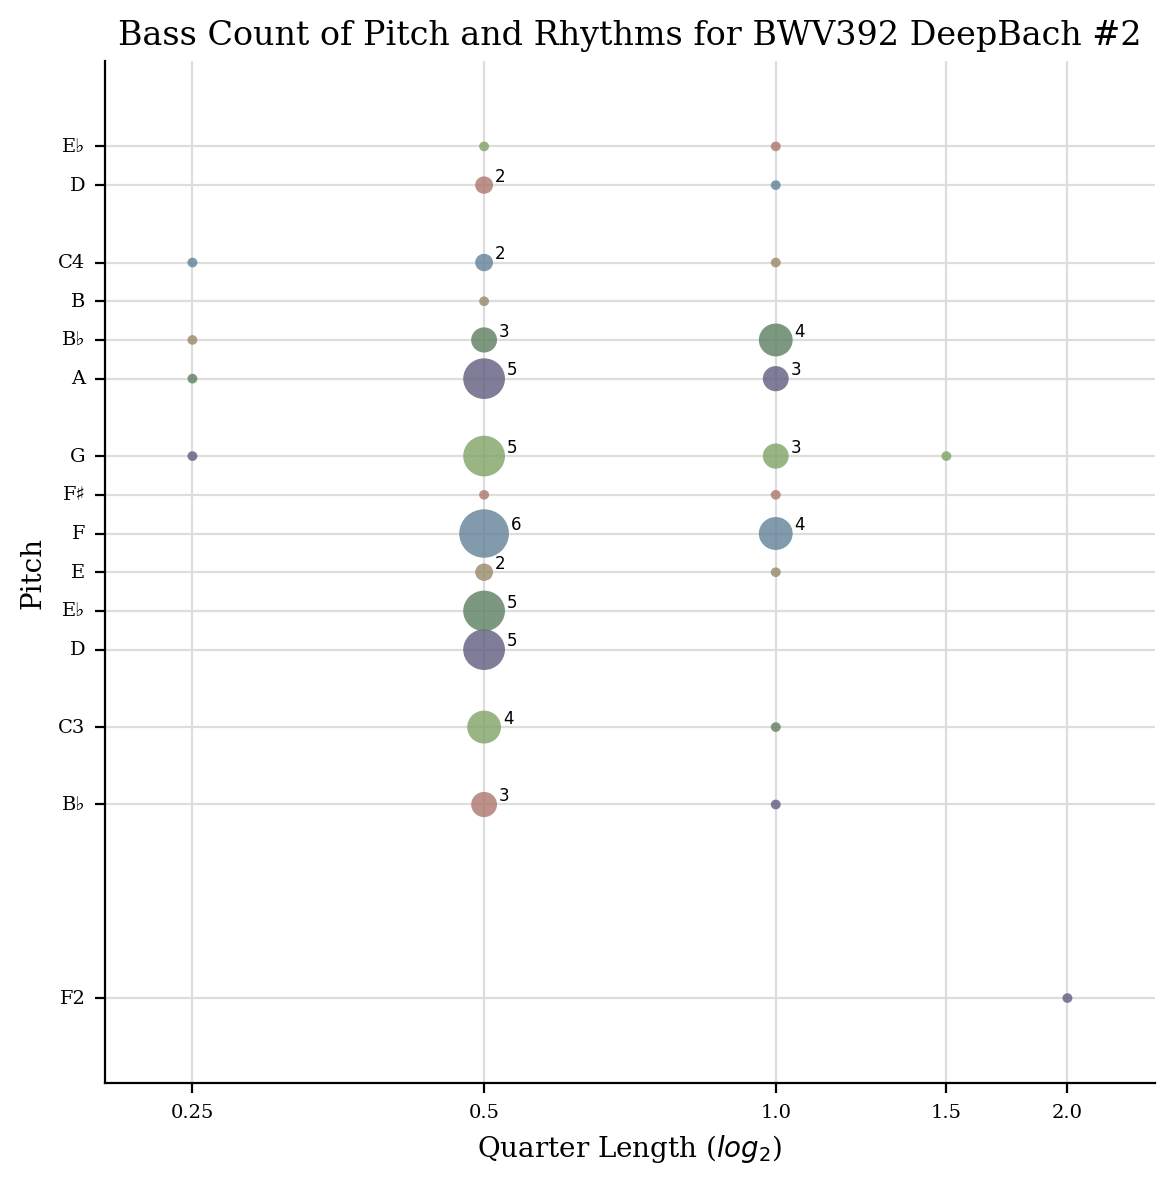

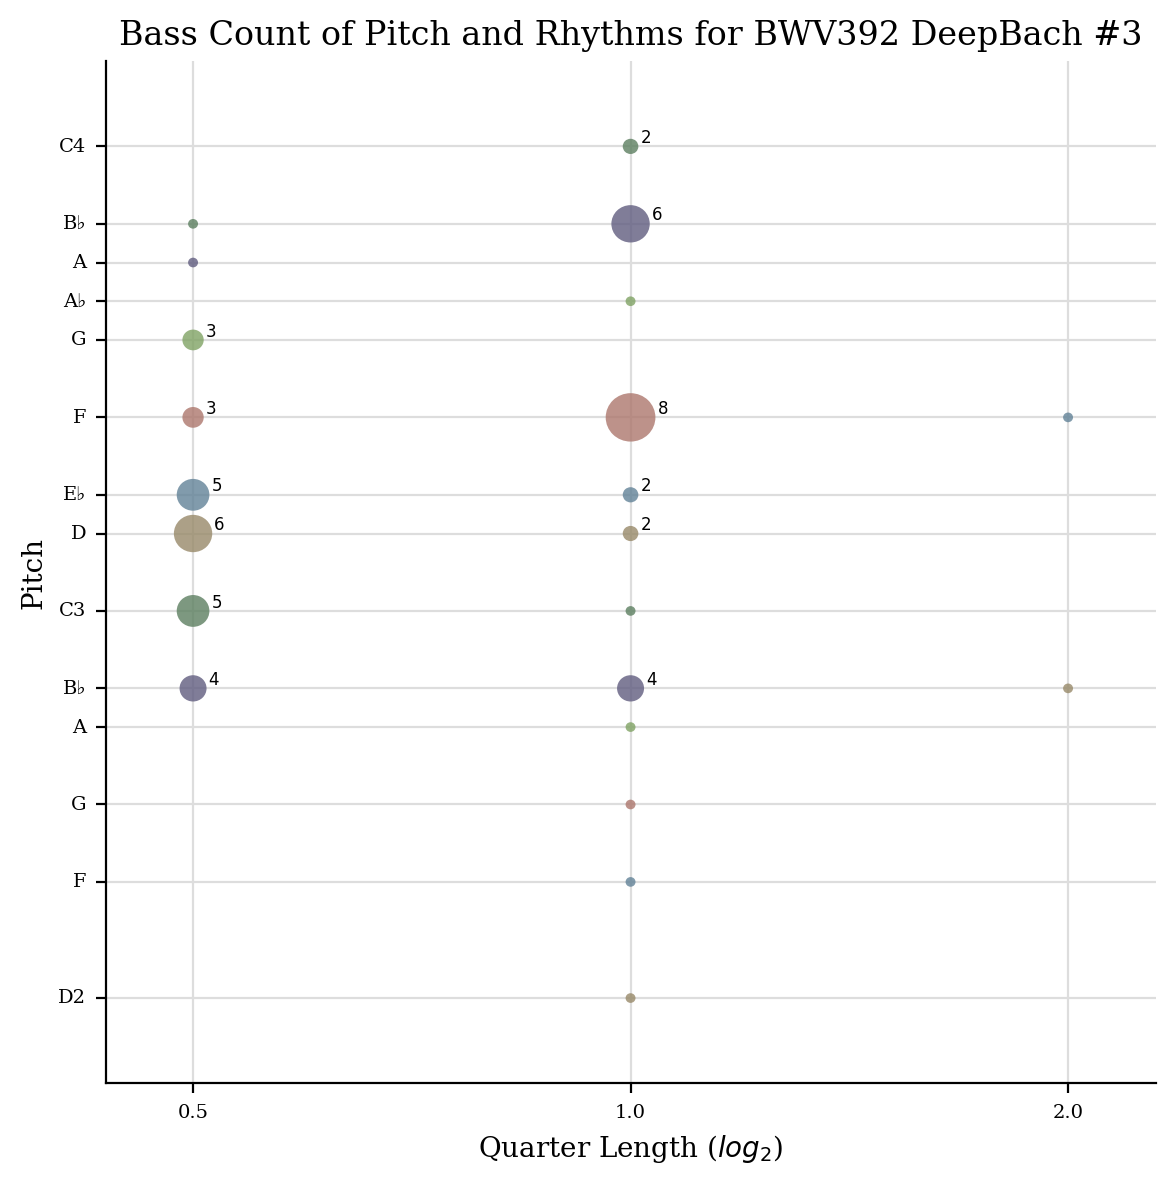

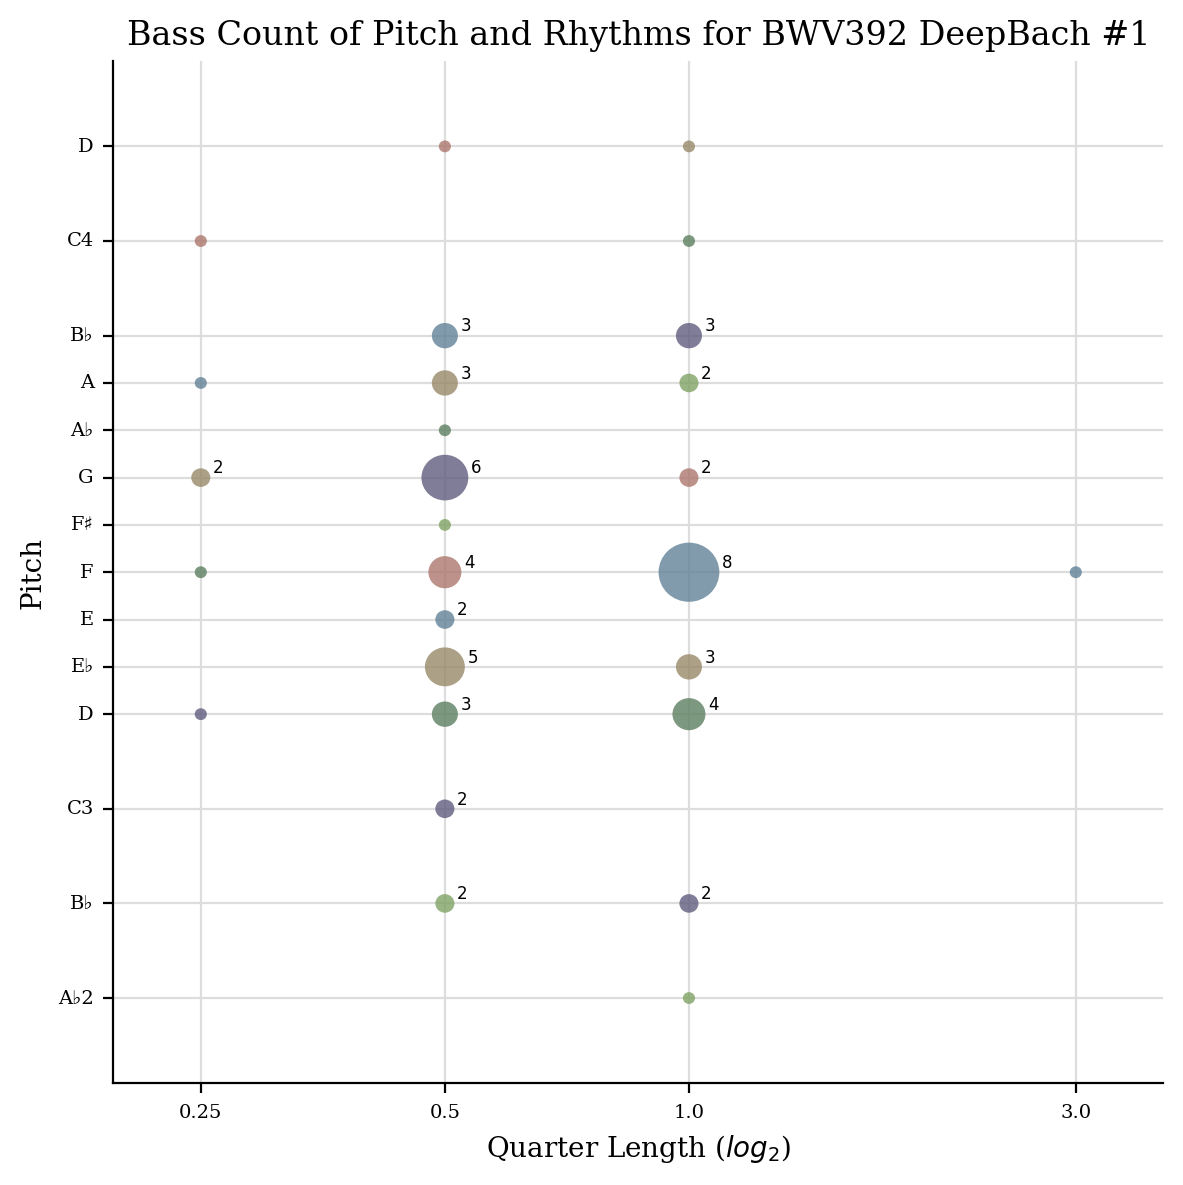

In [52]:
plot_pitch_rhythm_distributions(score_dict, 'Bass Count of Pitch and Rhythms for BWV392', part='B')